In [1]:
# Emilie Helen Wolf
# February, 10, 2022

# This project demonstrates my knowledge of k-means and hierarchical clustering on stocks

# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [2]:
# To manipulate arrays and dataframes
import numpy as np
import pandas as pd

# To define maximum number of rows and columns to be displayed in a dataframe
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("talk")

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_style("darkgrid")
sns.set_context("talk")

In [4]:
# Upload .csv as pandas dataframe and make a copy

stock_data = pd.read_csv('stock_data.csv')
df = stock_data.copy()

# Look at first 5 rows
df.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines         42.350        10.000       1.687  135   
1        Pharmaceuticals         59.240         8.339       2.198  130   
2  Health Care Equipment         44.910        11.301       1.274   21   
3   Application Software         93.940        13.977       1.358    9   
4         Semiconductors         55.320        -1.828       1.701   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000              11.390   
1          77       51000000  5144000000               3.150   
2          67      938000000  4423000000               2.940   
3         180     -240840000   629551000               1.260   
4         272      315120000   696878000               0.310   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                 668129938.500      3.718     -8.784  
1                1633015873.000     18.806     -8.750  
2                1504421769.000     15.276     -0.394  
3                 499643650.800     74.556      4.200  
4                2247993548.000    178.452      1.060

In [5]:
# Look at last 5 rows
df.tail()

Ticker Symbol                Security             GICS Sector  \
335          YHOO              Yahoo Inc.  Information Technology   
336           YUM         Yum! Brands Inc  Consumer Discretionary   
337           ZBH  Zimmer Biomet Holdings             Health Care   
338          ZION           Zions Bancorp              Financials   
339           ZTS                  Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
335  Internet Software & Services         33.260        14.888       1.845   
336                   Restaurants         52.516        -8.699       1.479   
337         Health Care Equipment        102.590         9.348       1.404   
338                Regional Banks         27.300        -1.159       1.468   
339               Pharmaceuticals         47.920        16.679       1.610   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
335   15         459    -1032187000 -4359082000              -4.640   
336  142          27      159000000  1293000000               2.970   
337    1         100      376000000   147000000               0.780   
338    4          99      -43623000   309471000               1.200   
339   32          65      272000000   339000000               0.680   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
335                 939457327.600     28.976      6.262  
336                 435353535.400     17.682     -3.838  
337                 188461538.500    131.526    -23.884  
338                 257892500.000     22.750     -0.063  
339                 498529411.800     70.471      1.723

It appears the dataset is in alphabetical order

## Next: Data Overview

- Observations
- Sanity checks

In [6]:
# What's the shape?

df.shape

(340, 15)

340 rows and 15 columns

In [7]:
# What are the feature types and null count?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

- No missing values 
- 4 columns are object types
- 11 columns are numeric types
- Everything appears tidy and complete so far

In [8]:
# What are the distributions and statistics of the values?

df.describe(include='all').T

count unique  \
Ticker Symbol                    340    340   
Security                         340    340   
GICS Sector                      340     11   
GICS Sub Industry                340    104   
Current Price                340.000    NaN   
Price Change                 340.000    NaN   
Volatility                   340.000    NaN   
ROE                          340.000    NaN   
Cash Ratio                   340.000    NaN   
Net Cash Flow                340.000    NaN   
Net Income                   340.000    NaN   
Earnings Per Share           340.000    NaN   
Estimated Shares Outstanding 340.000    NaN   
P/E Ratio                    340.000    NaN   
P/B Ratio                    340.000    NaN   

                                                             top freq  \
Ticker Symbol                                               CELG    1   
Security                                    Digital Realty Trust    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                       mean            std              min  \
Ticker Symbol                           NaN            NaN              NaN   
Security                                NaN            NaN              NaN   
GICS Sector                             NaN            NaN              NaN   
GICS Sub Industry                       NaN            NaN              NaN   
Current Price                        80.862         98.055            4.500   
Price Change                          4.078         12.006          -47.130   
Volatility                            1.526          0.592            0.733   
ROE                                  39.597         96.548            1.000   
Cash Ratio                           70.024         90.421            0.000   
Net Cash Flow                  55537620.588 1946365312.176 -11208000000.000   
Net Income                   1494384602.941 3940150279.328 -23528000000.000   
Earnings Per Share                    2.777          6.588          -61.200   
Estimated Shares Outstanding  577028337.754  845849595.418     27672156.860   
P/E Ratio                            32.613         44.349            2.935   
P/B Ratio                            -1.718         13.967          -76.119   

                                        25%           50%            75%  \
Ticker Symbol                           NaN           NaN            NaN   
Security                                NaN           NaN            NaN   
GICS Sector                             NaN           NaN            NaN   
GICS Sub Industry                       NaN           NaN            NaN   
Current Price                        38.555        59.705         92.880   
Price Change                         -0.939         4.820         10.695   
Volatility                            1.135         1.386          1.696   
ROE                                   9.750        15.000         27.000   
Cash Ratio                           18.000        47.000         99.000   
Net Cash Flow                -193906500.000   2098000.000  169810750.000   
Net Inco

- The `Ticker Symbol` and `Security` columns have unique values for every row as expected, so **no duplicates**
- There are 11 unique Sectors
- There are 104 unique Sub Industries
- The values in each numeric column appear in their expected ranges
- However, scaling will be needed before clustering because the columns vary wildly in range (`Net Income` is in the billions)

In [9]:
# What are the 104 Sub Industries in order of frequency?

df["GICS Sub Industry"].value_counts()

Oil & Gas Exploration & Production                 16
Industrial Conglomerates                           14
REITs                                              14
Internet Software & Services                       12
Electric Utilities                                 12
MultiUtilities                                     11
Health Care Equipment                              11
Banks                                              10
Property & Casualty Insurance                       8
Diversified Financial Services                      7
Biotechnology                                       7
Pharmaceuticals                                     6
Oil & Gas Refining & Marketing & Transportation     6
Packaged Foods & Meats                              6
Semiconductors                                      6
Consumer Finance                                    5
Health Care Facilities                              5
Integrated Oil & Gas                                5
Industrial Machinery        

In [10]:
# What are the 11 sectors in order of frequency?

df["GICS Sector"].value_counts()

Industrials                    53
Financials                     49
Health Care                    40
Consumer Discretionary         40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: GICS Sector, dtype: int64

In [11]:
# What is the list of Sub Industries within each Sector?

df.groupby("GICS Sector")["GICS Sub Industry"].value_counts()

GICS Sector                  GICS Sub Industry                              
Consumer Discretionary       Hotels, Resorts & Cruise Lines                      4
                             Internet & Direct Marketing Retail                  4
                             Cable & Satellite                                   3
                             Restaurants                                         3
                             Specialty Stores                                    3
                             Advertising                                         2
                             Auto Parts & Equipment                              2
                             Automobile Manufacturers                            2
                             Broadcasting & Cable TV                             2
                             Homebuilding                                        2
                             Leisure Products                                    2
          

In [12]:
# Do any of the sub industries overlap into mulitple sectors?

# First, group the dataframe by the 11 sectors
# Next, find the unique value counts of all sub industries as seen in each sector
# Last, create a table of the counts and look at each row

# If there is no overlap, there should only be one value in each row

df.groupby("GICS Sector")["GICS Sub Industry"].value_counts().unstack(fill_value='').T

GICS Sector                                     Consumer Discretionary  \
GICS Sub Industry                                                        
Advertising                                                          2   
Aerospace & Defense                                                      
Agricultural Products                                                    
Air Freight & Logistics                                                  
Airlines                                                                 
Alternative Carriers                                                     
Apparel, Accessories & Luxury Goods                                  1   
Application Software                                                     
Asset Management & Custody Banks                                         
Auto Parts & Equipment                                               2   
Automobile Manufacturers                                             2   
Banks                                                                    
Biotechnology                                                            
Brewers                                                                  
Broadcasting & Cable TV                                              2   
Building Products                                                        
Cable & Satellite                                                    3   
Casinos & Gaming                                                     1   
Computer Hardware                                                        
Construction & Farm Machinery & Heavy Trucks                             
Construction Materials                                                   
Consumer Electronics                                                 1   
Consumer Finance                                                         
Copper                                                                   
Data Processing & Outsourced Services                                    
Distributors                                                         1   
Diversified Chemicals                                                    
Diversified Commercial Services                                          
Diversified Financial Services                                           
Drug Retail                                                              
Electric Utilities                                                       
Electrical Components & Equipment                                        
Electronic Components                                                    
Electronic Equipment & Instruments                                       
Environmental Services                                                   
Fertilizers & Agricultural Chemicals                                     
Financial Exchanges & Data                                               
Gold                                                                     
Health Care Distributors                                                 
Health Care Equipment                                                    
Health Care Facilities                                                   
Health Care Supplies                                                     
Home Entertainment Software                                              
Home Furnishings                                                     1   
Homebuilding                                                         2   
Hotels, Resorts & Cruise Lines                                       4   
Household Appliances                                                 1   
Household Products                                                       
Housewares & Specialties                                             1   
Human Resource & Employment Services                                     
IT Consulting & Other Services                                           
Industrial Conglomerates                                                 
Indu

## There is no overlap, so the data is extremely tidy as far as we can tell.

# Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like? (histplot and boxplot)
2. The stocks of which economic sector have seen the maximum price increase on average? (histplot and boxplot)
3. How are the different variables correlated with each other? (heatmap)
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors? (histplot and boxplot)
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors? (histplot and boxplot)

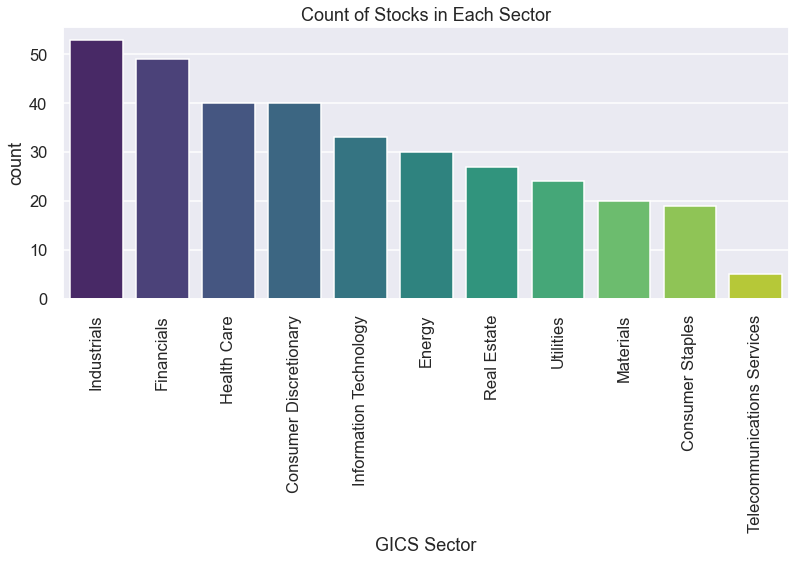

In [13]:
# What is the distribution of economic sectors? 

plt.figure(figsize=(13, 5))
sns.countplot(x=df['GICS Sector'], palette='viridis', order = df['GICS Sector'].value_counts().index)
plt.title("Count of Stocks in Each Sector")
plt.xticks(rotation=90);

### Above is our dataset of stocks classified by Sectors and in order of frequency.

### Do the stocks in each sector perform the same?

Before finding groups through applied math and clustering techniques, let's explore the stocks in each sector and look for patterns in the obviousl groups first.

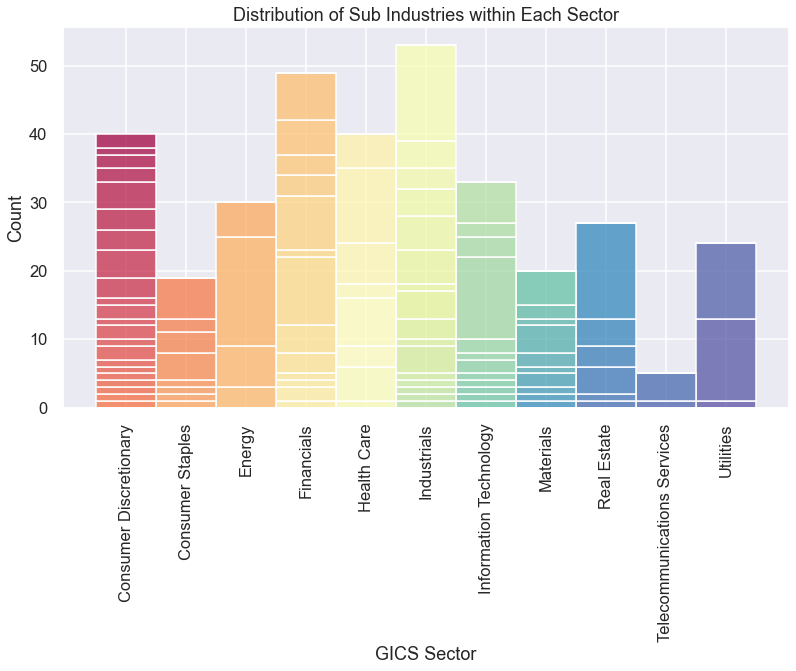

In [14]:
# What is the visual distribution of stocks broken down by sector and sub industry?

plt.figure(figsize=(13,7))
sns.histplot(df.sort_values(by=['GICS Sector'], ascending=(True)).reset_index(drop=True), 
             x='GICS Sector',
             stat='count',
             hue='GICS Sub Industry',
#              hue_order=ind_ordered_list,
             palette='Spectral',
             multiple='stack')
plt.xticks(rotation=90);
plt.title("Distribution of Sub Industries within Each Sector")
plt.legend([],[], frameon=False)

### Observation:
- `Consumer Discretionary` seems like a broad, umbrella sector because it has the most unique sub industries
- `Telecommunication Services` has only 2 unique sub industries
- `Energy` and `Utilities` also seem to have a very small set of unique sub industries

### Next: Histogram and Boxplot Analysis of each numeric feature, as a whole, and grouped by sector

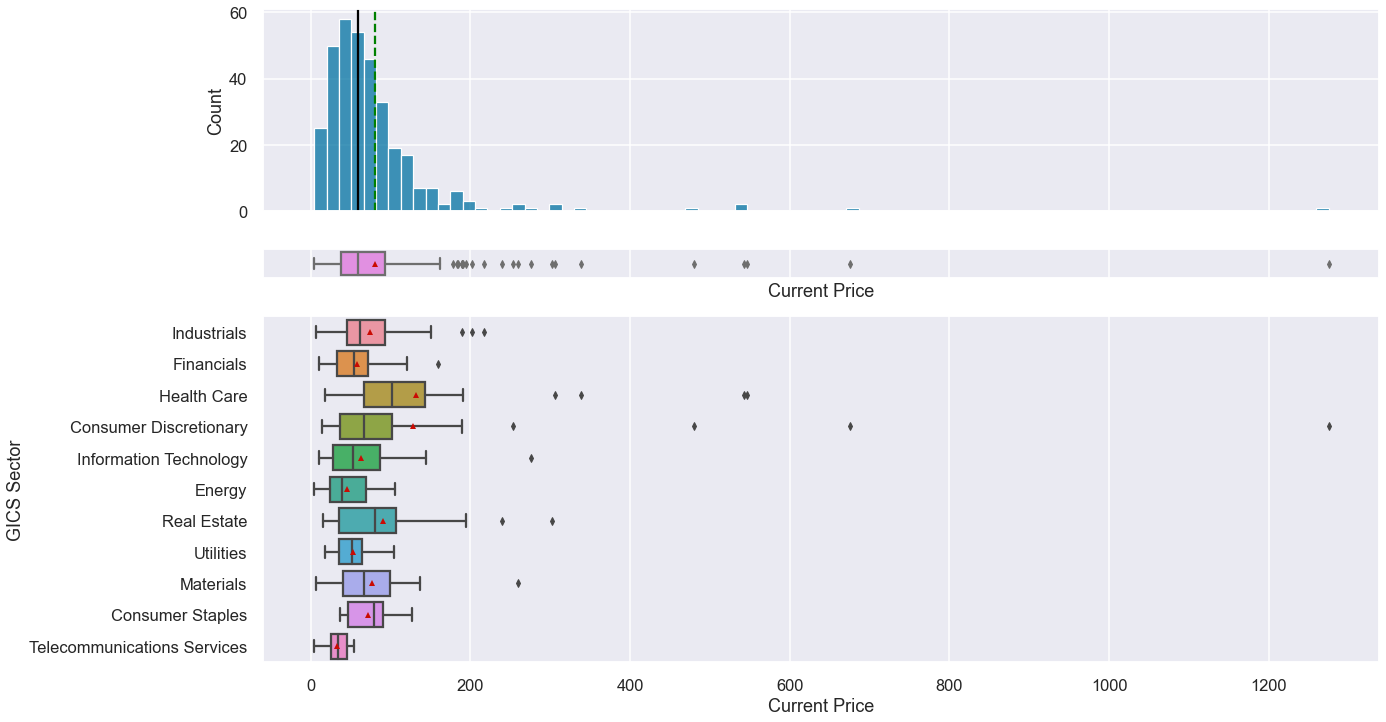

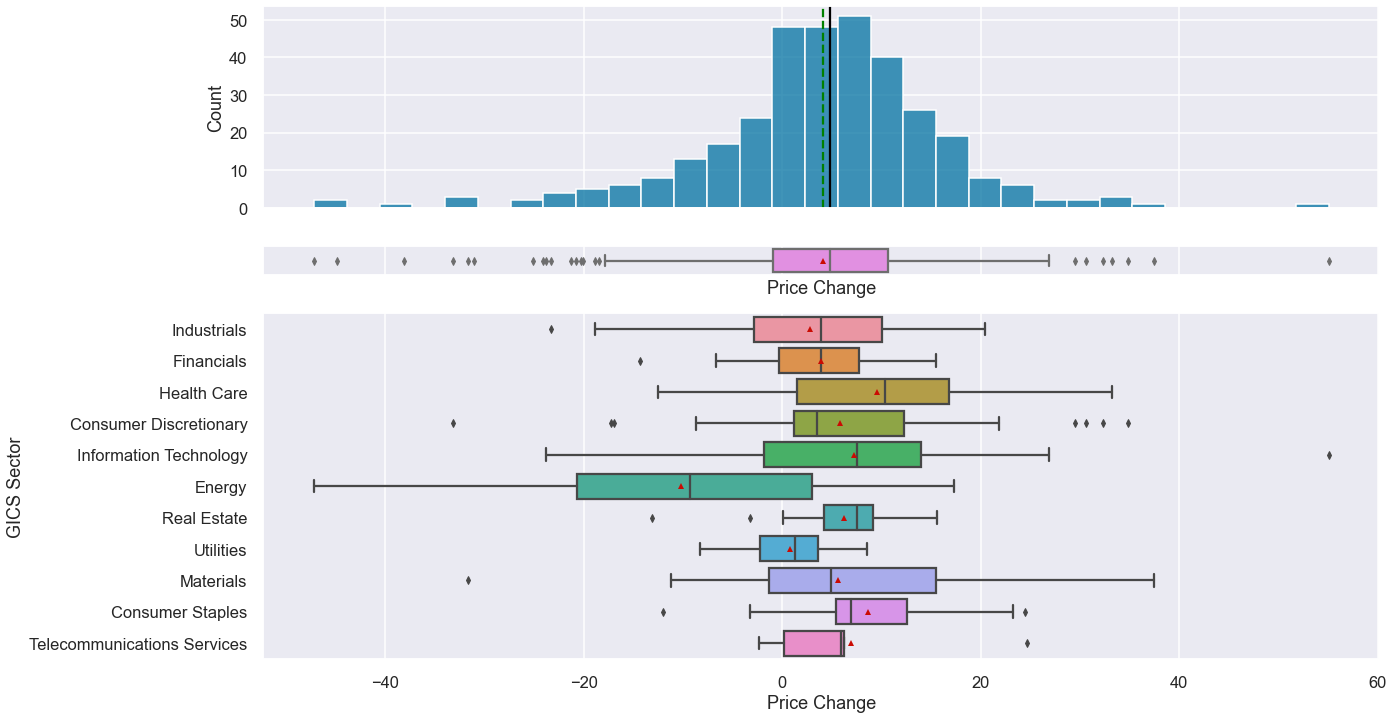

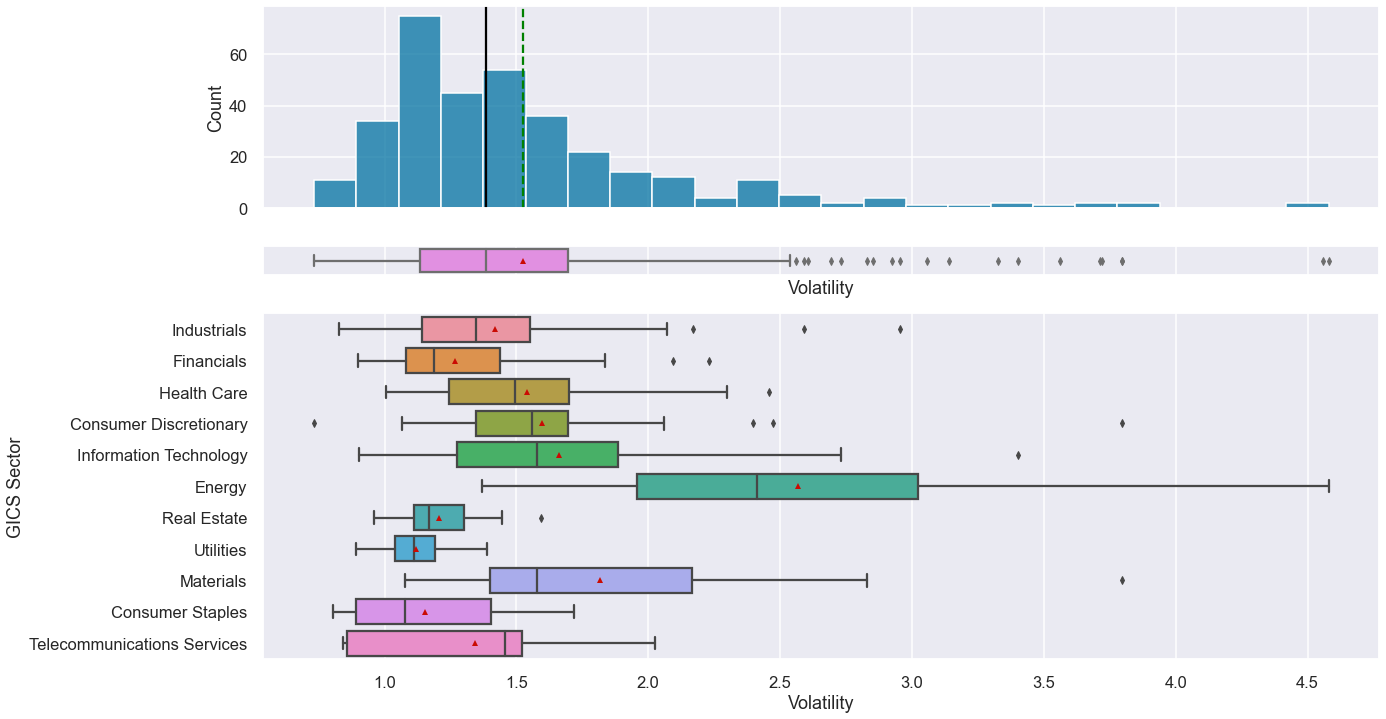

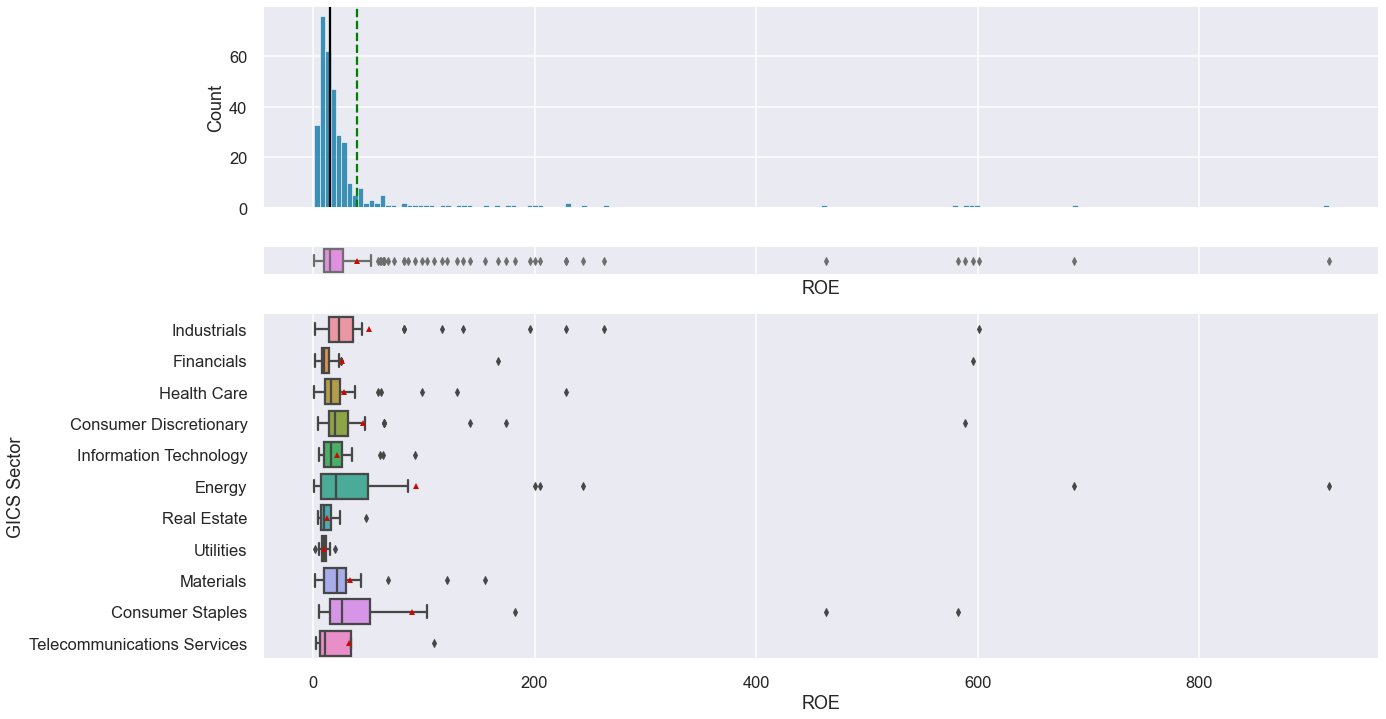

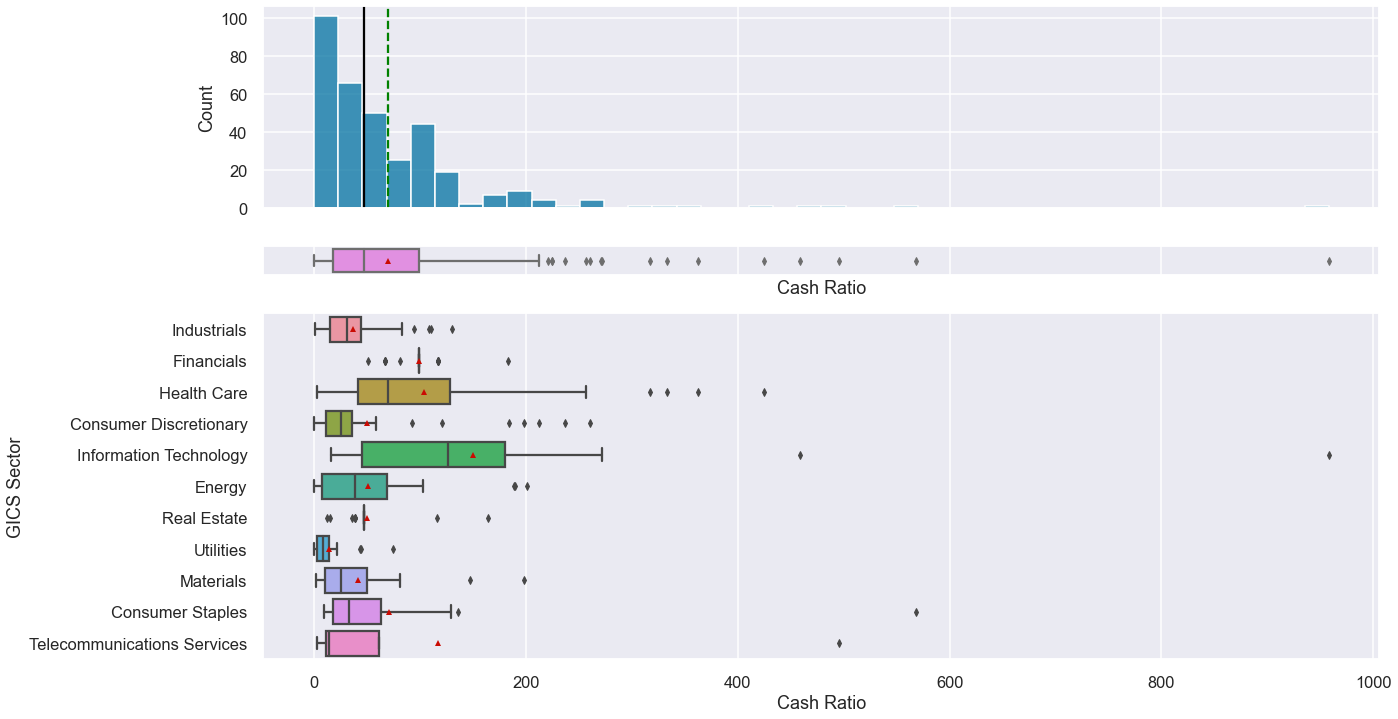

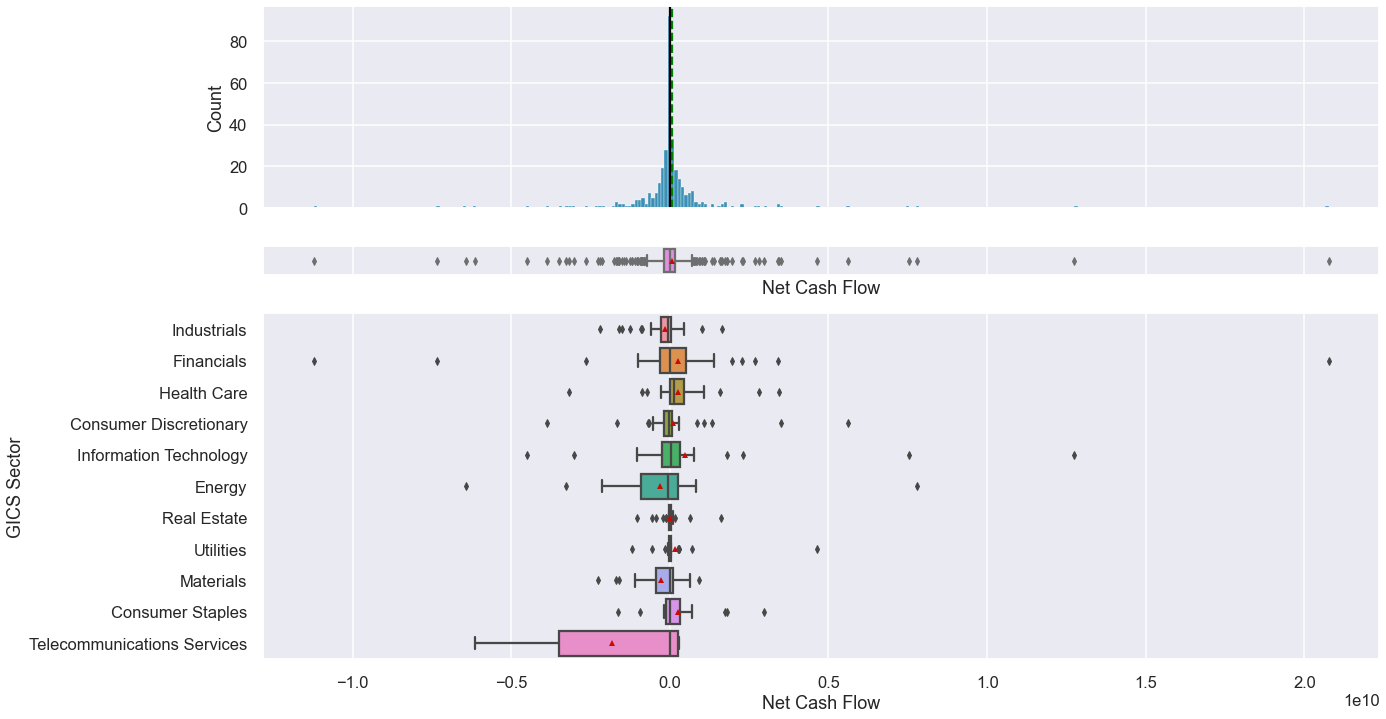

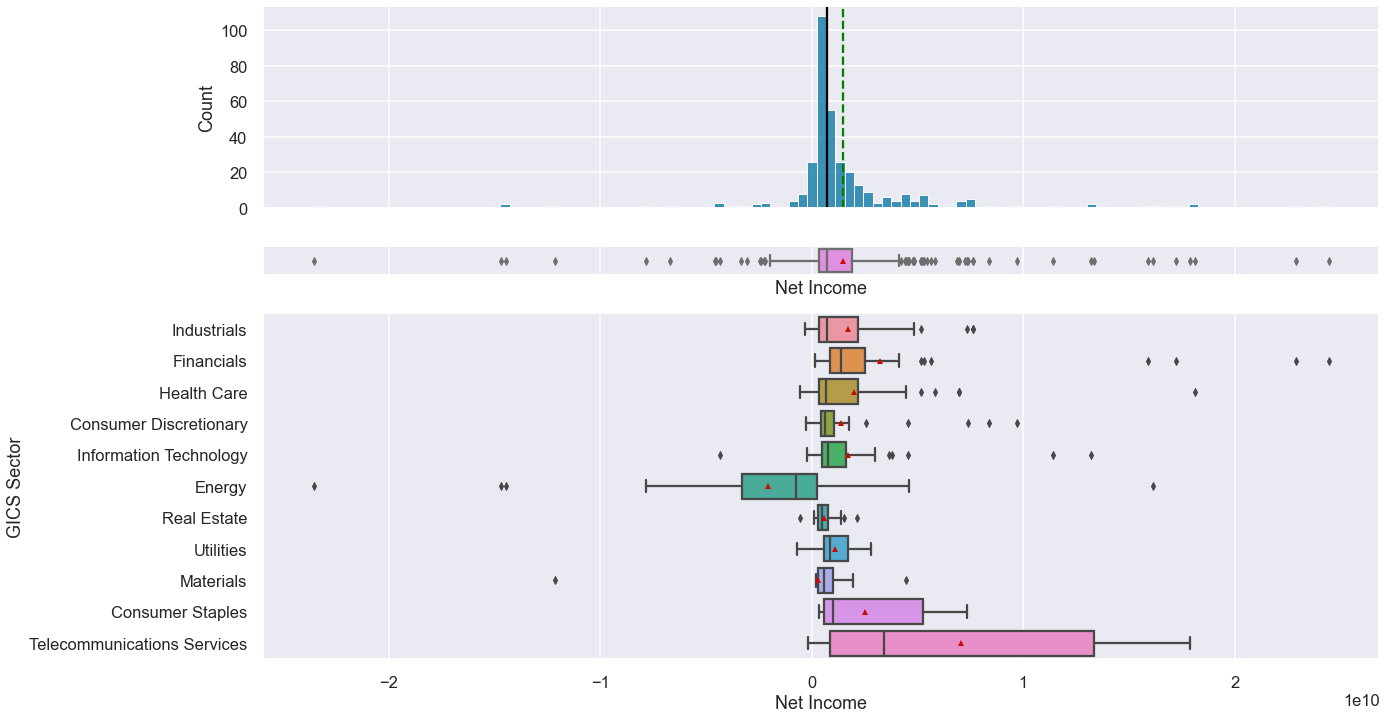

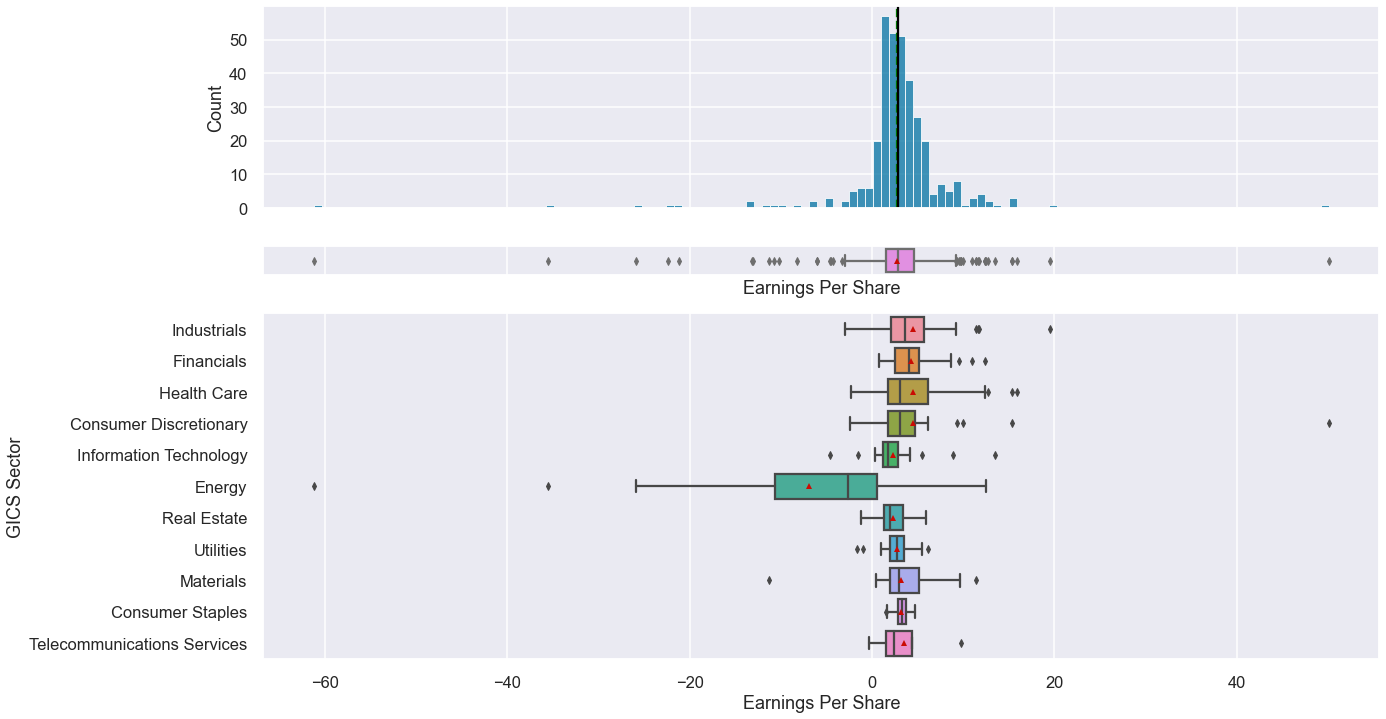

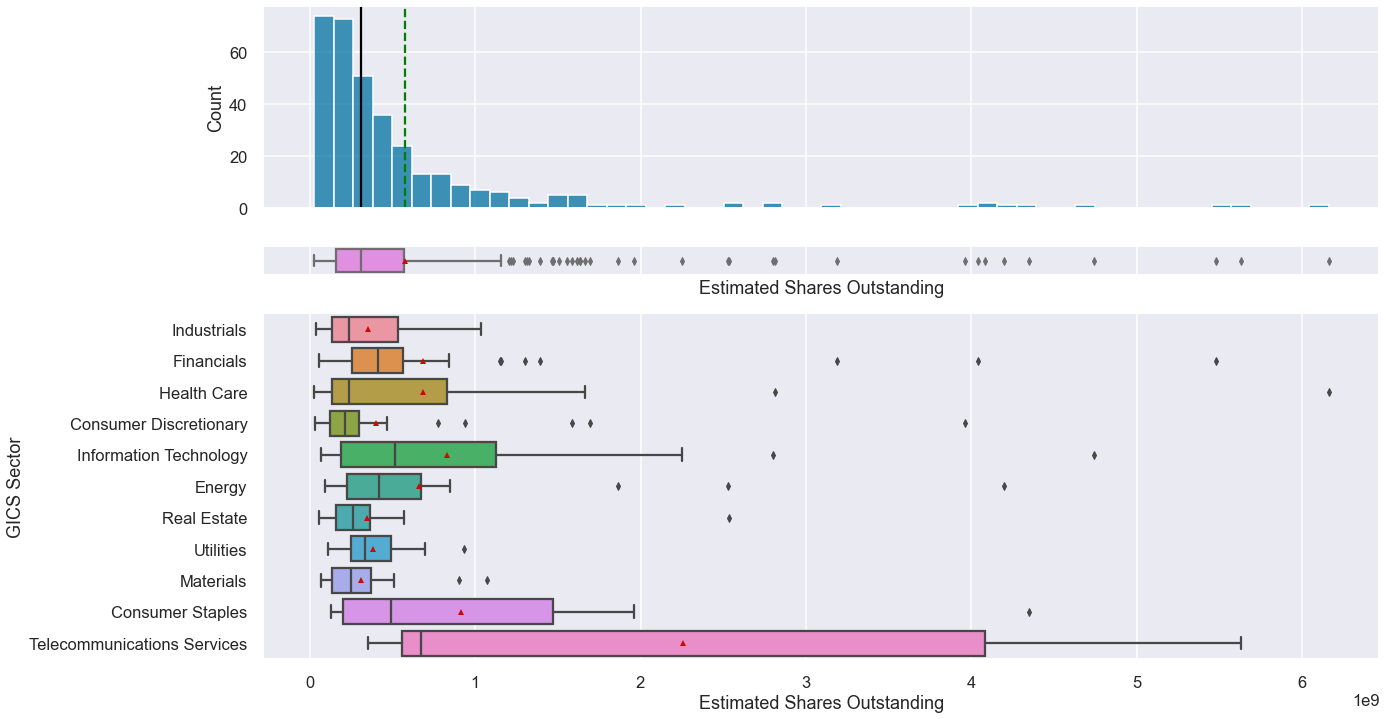

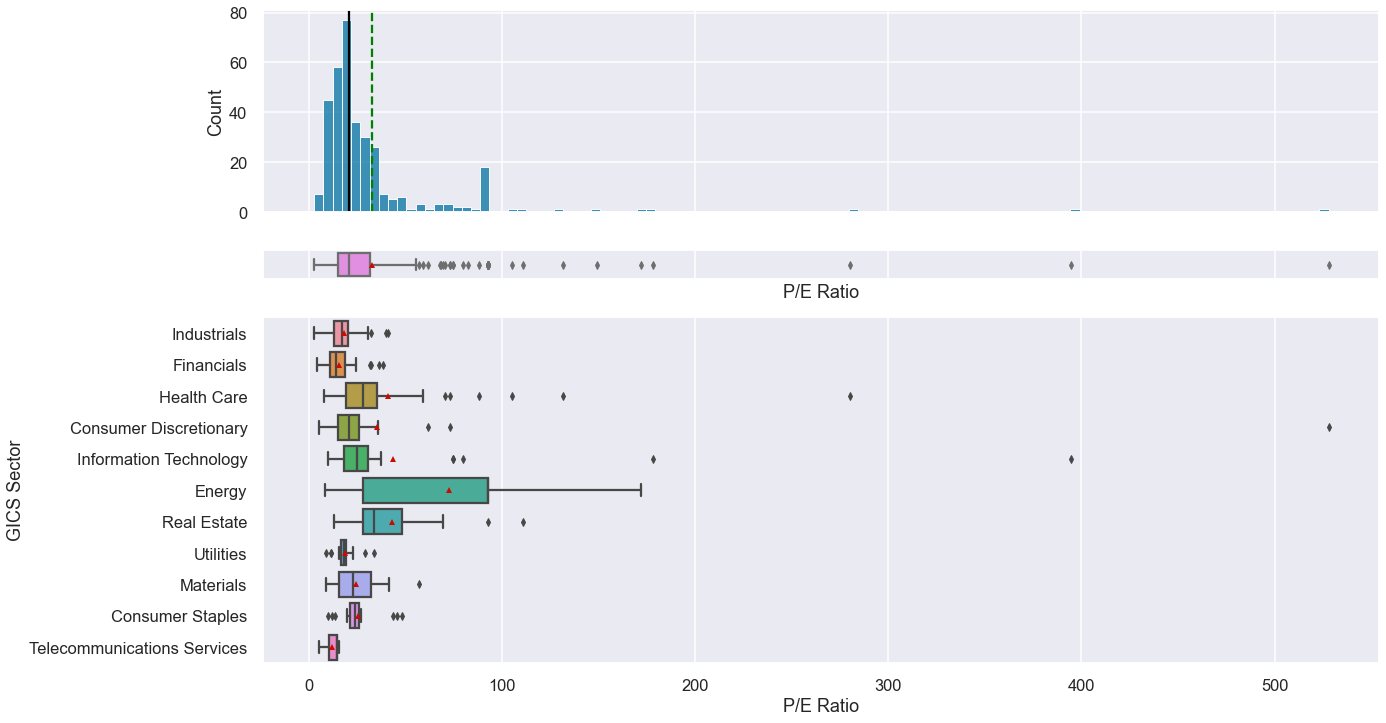

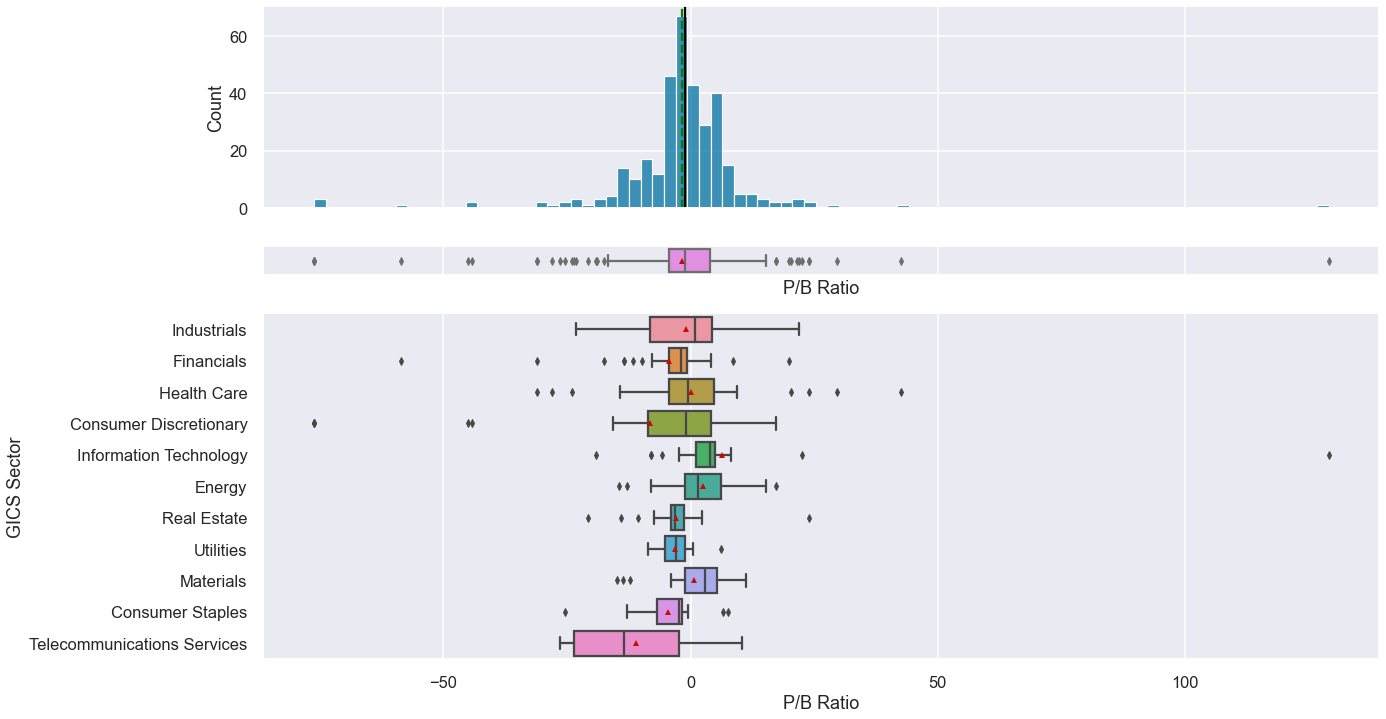

In [15]:
# function to plot a histogram and boxplots on the same x-axis for each numeric feature

def histogram_boxplot(data, feature, figsize=(20, 12), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_hist2, ax_box2, ax_sector2) = plt.subplots(
        nrows=3,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.35, 0.05, 0.6)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(
        data=data, x=feature, ax=ax_sector2, showmeans=True, 
        y='GICS Sector', order = df['GICS Sector'].value_counts().index
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

    
    
for feature in df.select_dtypes([np.number]).columns:
    histogram_boxplot(
        df, feature, kde=False, bins=None
    )  
  


In [16]:
# What are the top 5 stocks with the highest current price?

df.sort_values(by='Current Price',
               ascending=False)[0:5][['Ticker Symbol','Security','Current Price']].reset_index(drop=True)

Ticker Symbol                 Security  Current Price
0          PCLN        Priceline.com Inc       1274.950
1          AMZN           Amazon.com Inc        675.890
2          ISRG  Intuitive Surgical Inc.        546.160
3          REGN                Regeneron        542.870
4           CMG   Chipotle Mexican Grill        479.850

# Observations of Variables and Sector Analysis:

### 1. What does the distribution of stock prices look like?

- Current Price: 
    - The mean stock price is 80.86 dollars and the histogram looks normally distributed with skewness to the right.
    - Most stocks are under 200 dollars but there are some outliers, most notably the outlier of 1274.95 dollars for PriceLine. These outliers match up with stock price ranges, so we assume they are accurate.
    - The `Health Care` sector seems to have the greatest average current price.
    
### 2. The stocks of which economic sector have seen the maximum PRICE INCREASE on average?

- Price Change: 
    - The histogram on price change percentage looks mostly normal for the entire dataset.
    - The `Health Care` sector has the greatest Price Change on average.
    - The `Energy` sector stands out in the negative.



- Volatility: 
    - It has a somewhat normal distribution with a long tail on the right.
    - The sector with the most volatility is `Energy`
    - The sector with the least volatility is `Utilities`
- ROE: 
    - There are many outliers spreading out the data
    - The sectors with the best ROE are `Energy` and `Consumer Staples`
    
### 4.     Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
- Cash Ratio: 
    - Highest cash ratio sector is `Information Technology`
    - Next highest are `Health Care` and `Energy`
    - Lowest cash ratio sector is `Utilities`
    
    
    
- Net Cash Flow: 
    - Overall, most stocks are distributed normally around zero
    - `Telecommunication Services` and `Energy` have the lowest Net Cash Flow of all the sectors
- Net Income: 
    - Normal distribution that is right-skewed
    - The sector with the lowest Net Income is `Energy`
- Earnings Per Share: 
    - Normally distributed with an average at 2.77
    - `Energy` standing out in the negative again
- Estimated Shares Outstanding: 
    - `Telecommunication Services` has the most estimated outstanding shares
    
### 5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

- P/E Ratio: 
    - `Energy` stands out again with the highest average P/E ratio
    - The next highest sectors are `Real Estate` and `Information Technology`
    - The lowest average P/E ratio belongs to `Telecommunication Services`
    
    
- P/B Ratio: 
    - Normal distribution around 0
    - The lowest P/B ratio belongs to `Telecommunication Services`
    

#### The patterns in these variables and sectors may not be clear yet, but `Energy` definitely stands out as the most unique sector in most of the variables

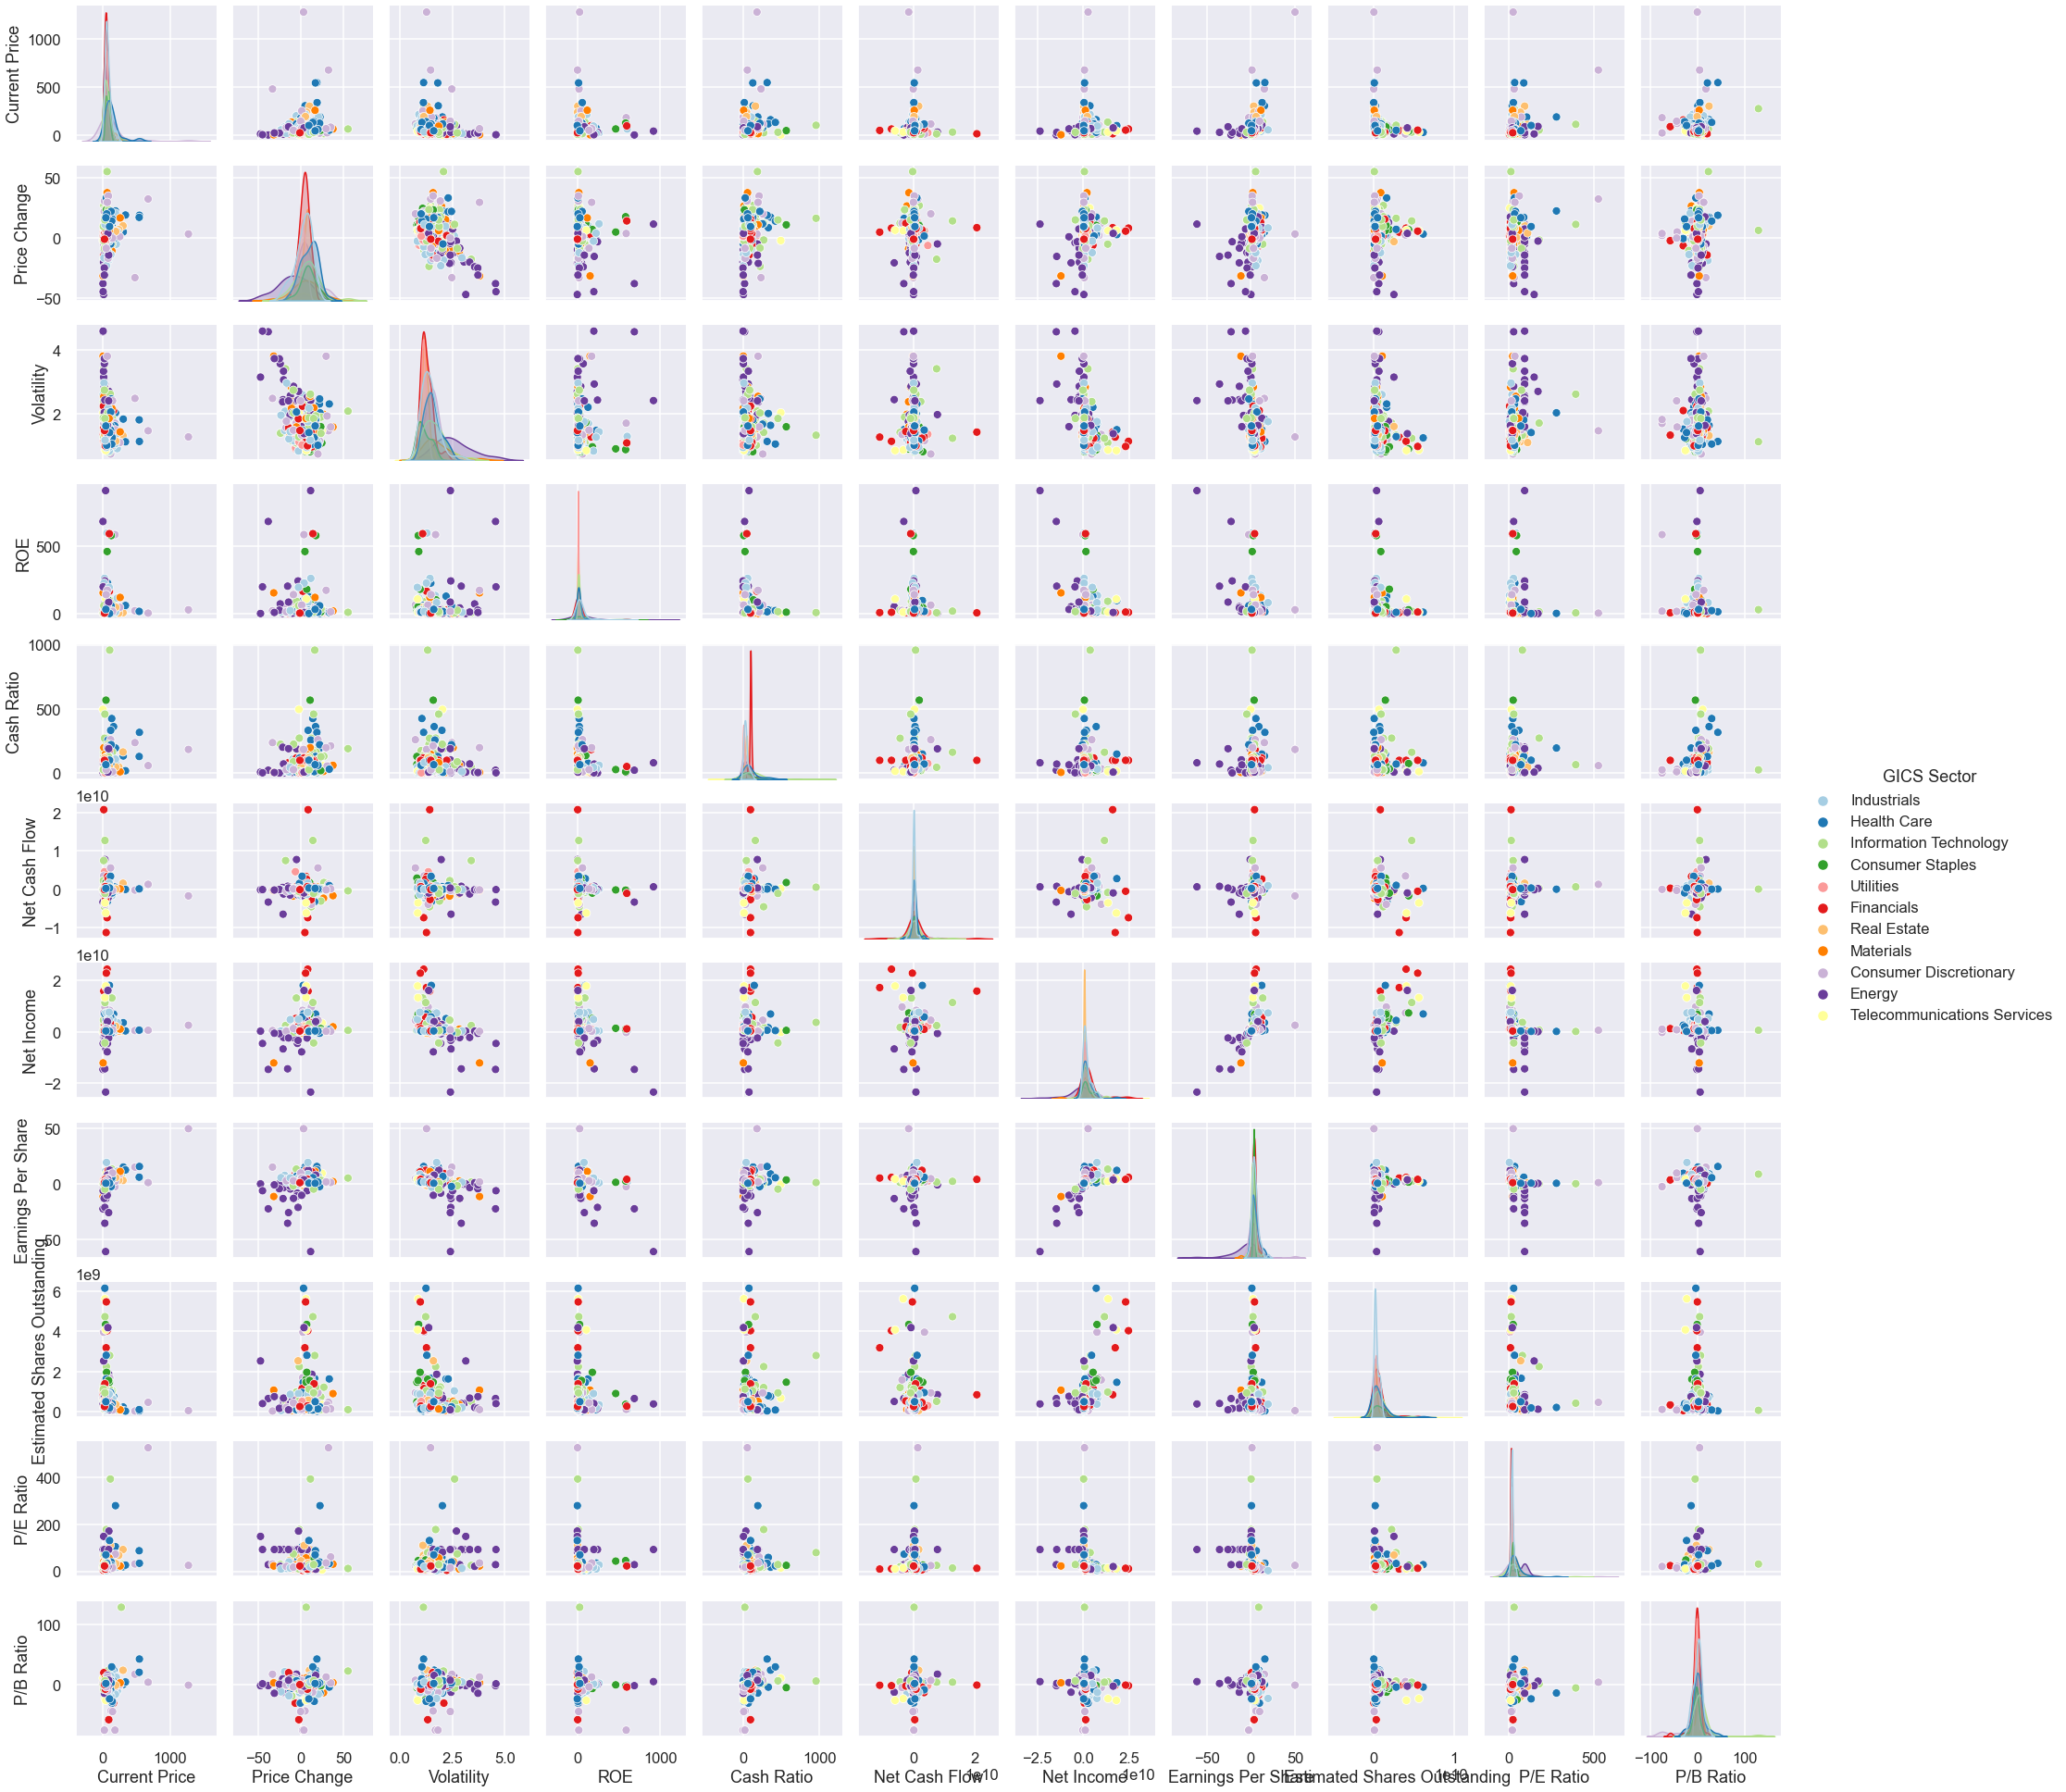

In [17]:
# What do all the scatterplots look like with Sector as the hue?

sns.pairplot(data=df, hue='GICS Sector', palette='Paired')

### Looking for patterns
If you notice closely among all the scatterclouds, the dark purple points seem to extend out away from the centers. Those outliers are none other from the `Energy` sector! What other colors stand out? Do we see any clusters?

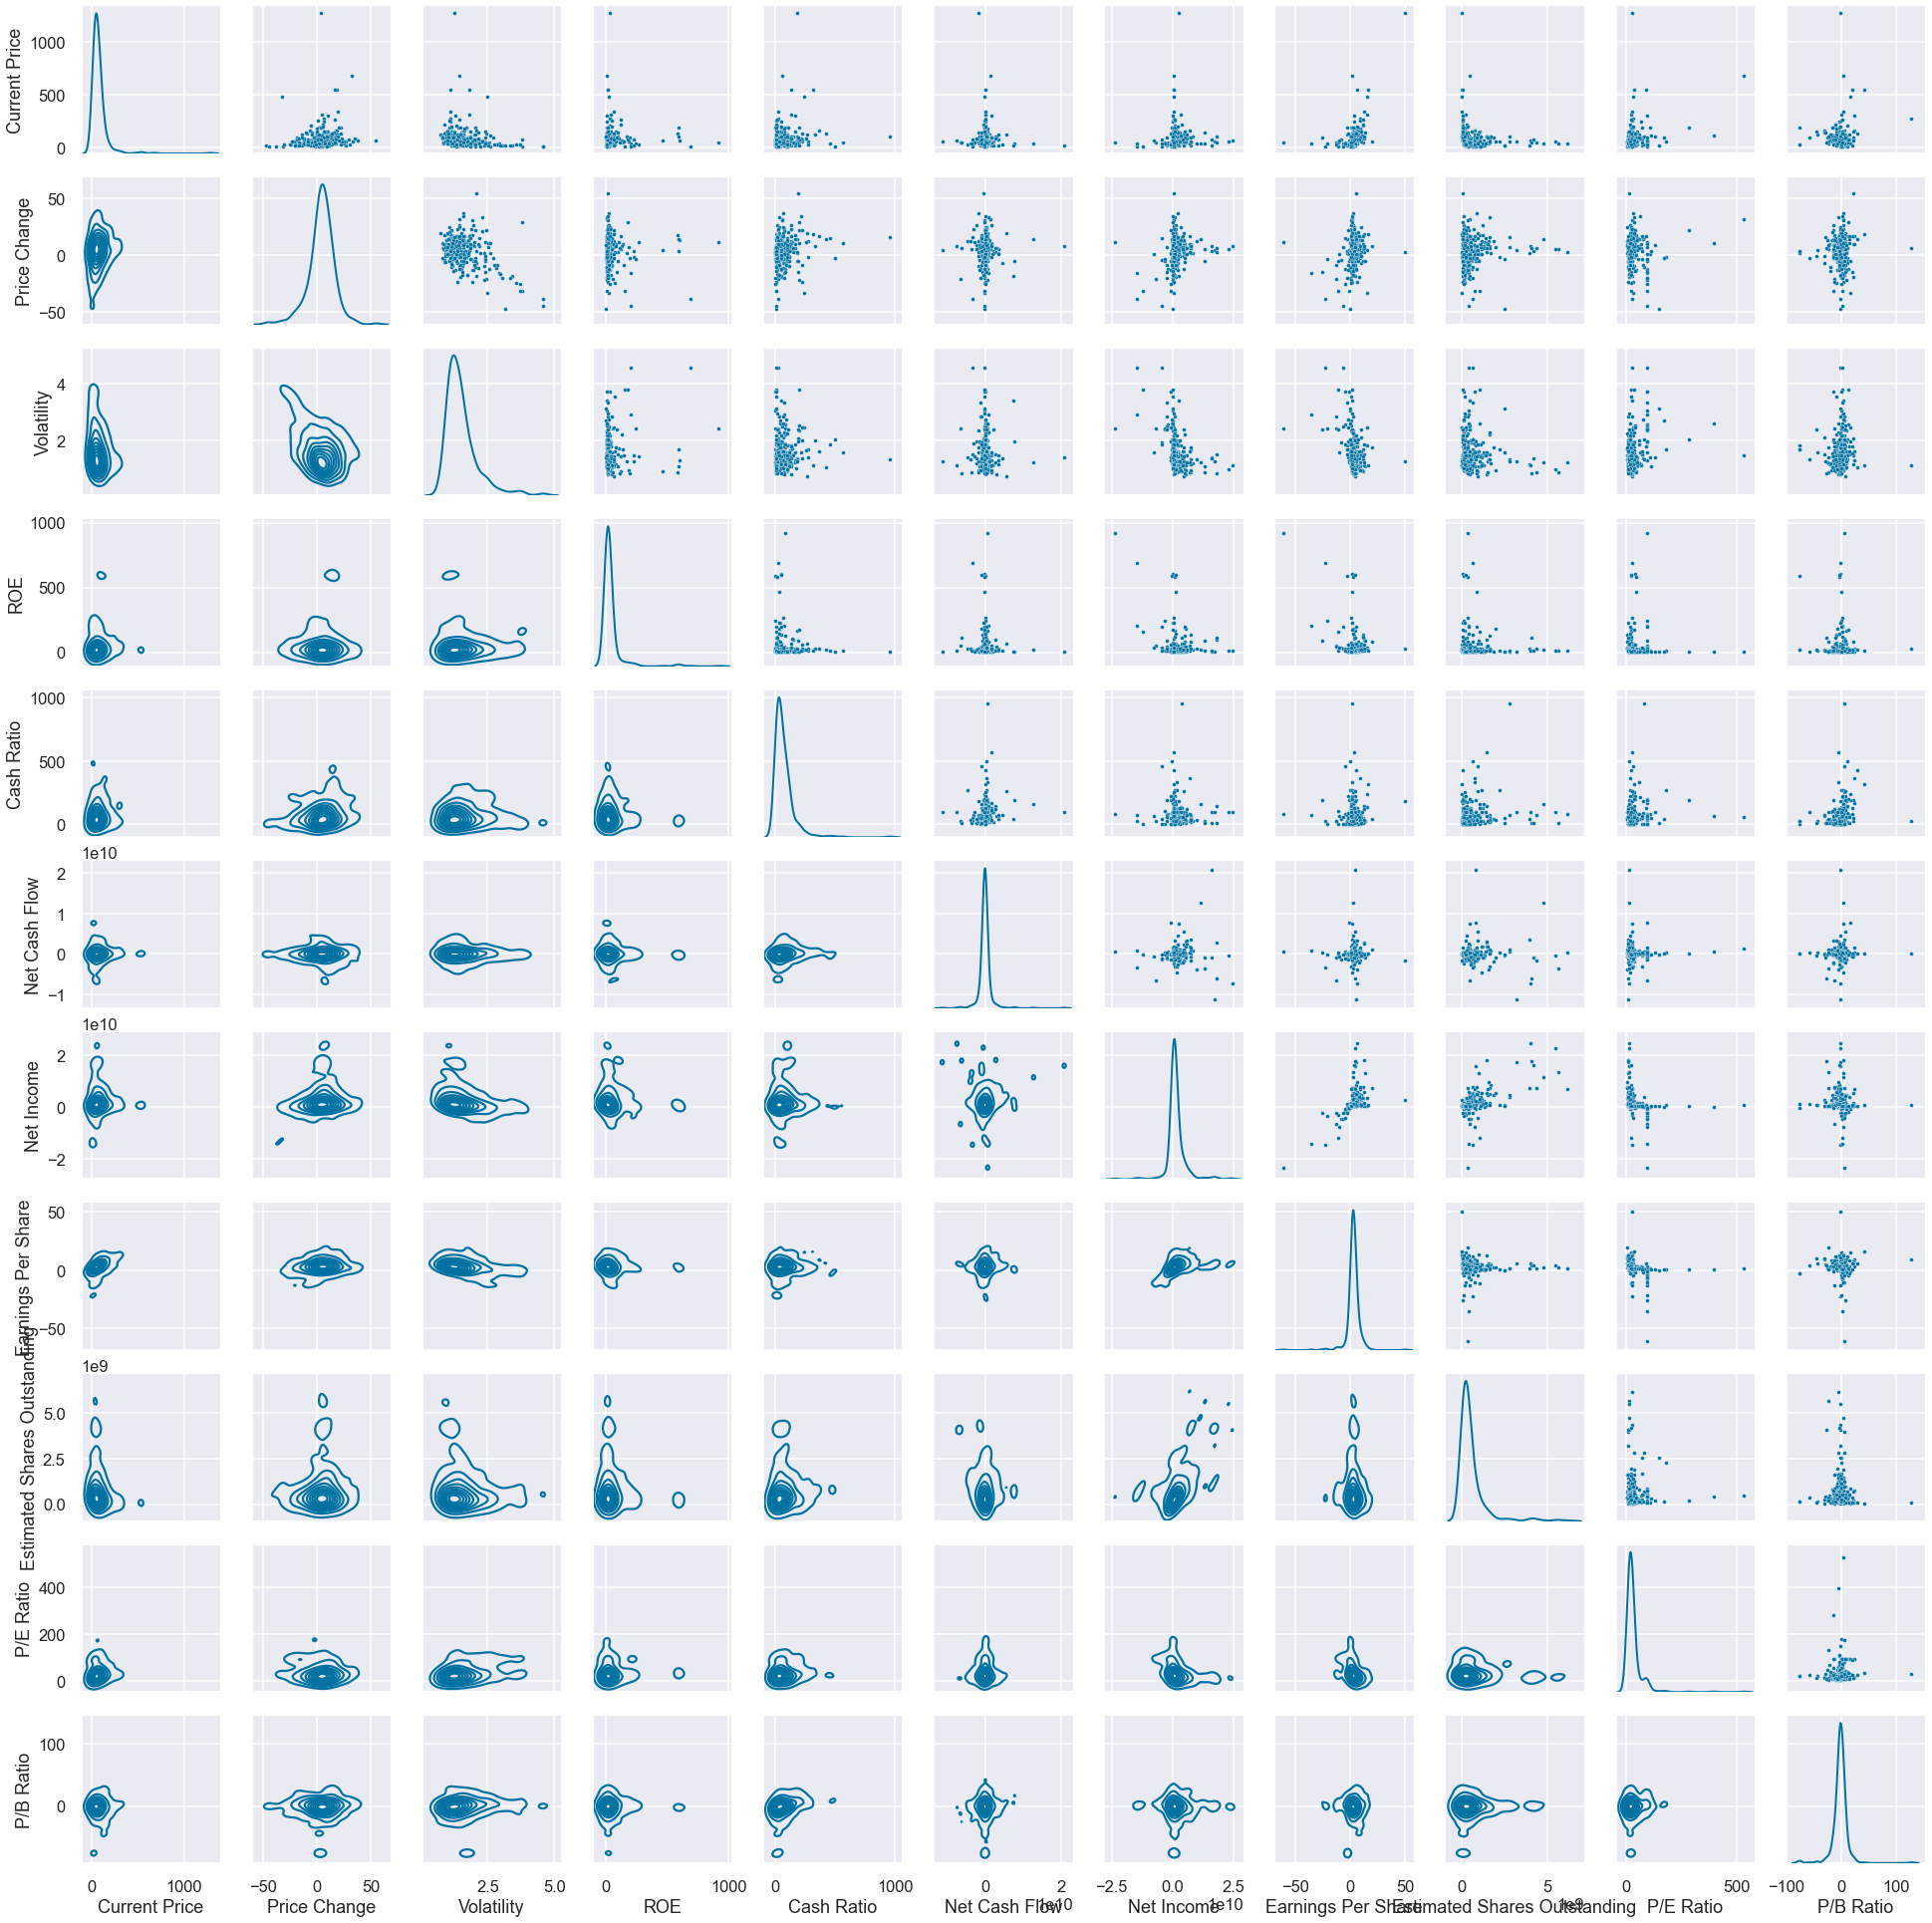

In [18]:
# Let's look for more patterns

g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)


# 👁️ See the possible clusters in the density contours?

<AxesSubplot:xlabel='P/B Ratio', ylabel='Net Income'>

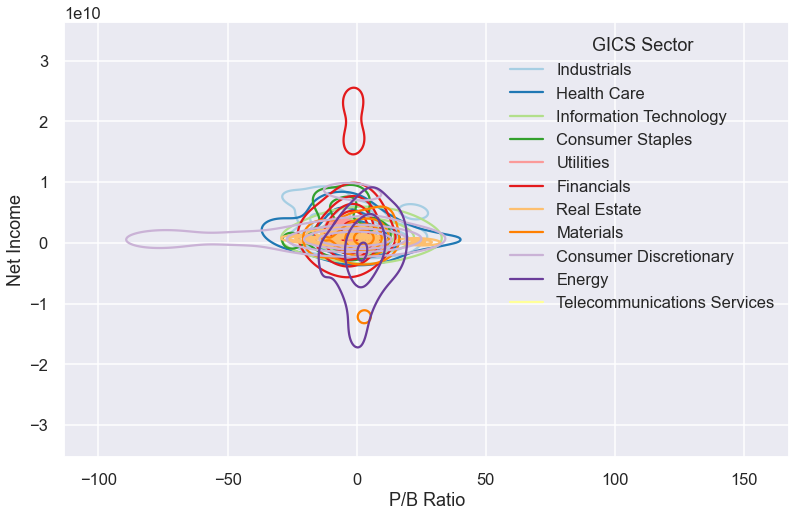

In [19]:
# Closeup of Net Income vs P/B Ratio vs Sector

plt.figure(figsize=(13,8))
sns.kdeplot(
    data=df,
    y="Net Income", x="P/B Ratio", hue='GICS Sector', palette='Paired')

Text(0.5, 1.0, 'Correlation Coefficients of Numerical Variables')

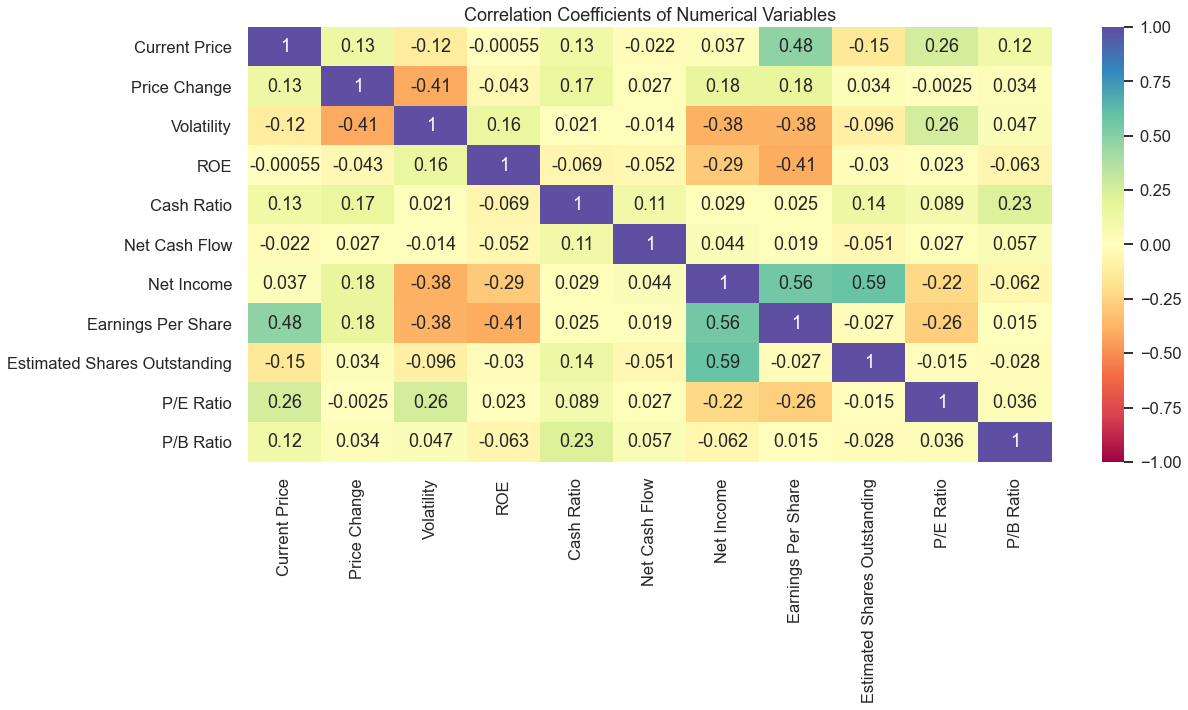

In [20]:
# What are the correlations of variables?

plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.title("Correlation Coefficients of Numerical Variables")

### 3. How are the different variables correlated with each other?

### Observations:

- As expected, Net Income is positively correlated with Estimated Shares Outstanding and Earnings Per Share
- Earnings Per Share is positively correlated with both Net Income and Current Price, but Net Income and Current Price are not correlated to each other.
- The weakest correlation is between Current Price and ROE
- As volatility increases, price change, net income, and earnings per share all tend to decrease.
- As ROE increases, earnings per share usually decreases.

Text(0.5, 1.0, 'Example scatterplot of Weakest correlation')

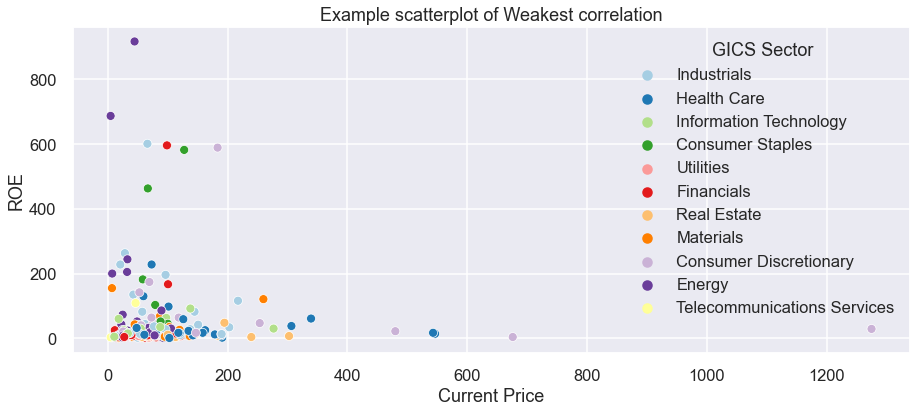

In [21]:
# What does the weakest correlation look like?

plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x='Current Price', y='ROE', hue='GICS Sector', palette="Paired")
plt.title("Example scatterplot of Weakest correlation")

Text(0.5, 1.0, 'Example scatterplot of Strongest correlation')

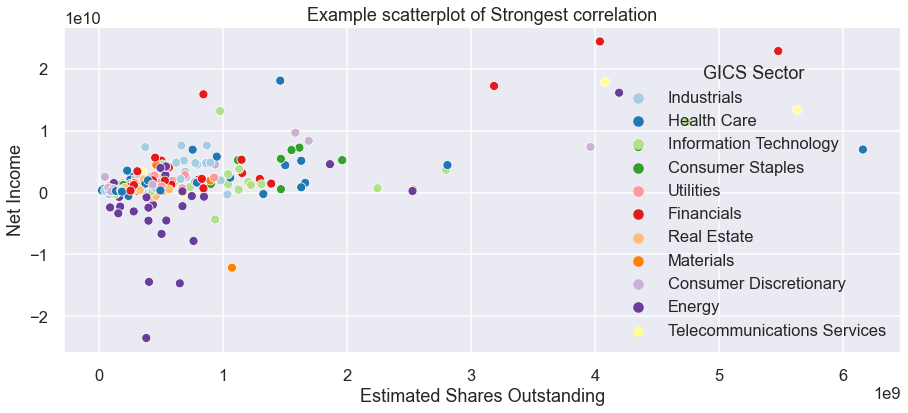

In [22]:
# What does the strongest correlation look like?

plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x='Estimated Shares Outstanding', y='Net Income', hue='GICS Sector', palette="Paired")
plt.title("Example scatterplot of Strongest correlation")

<AxesSubplot:xlabel='Volatility', ylabel='Density'>

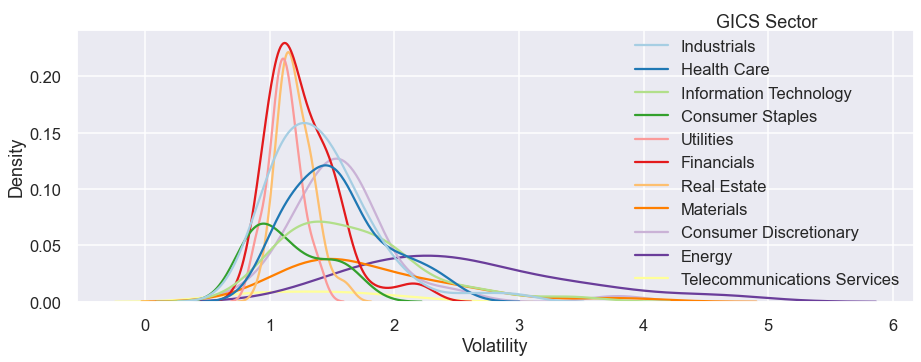

In [23]:
# What does a kdeplot of each sector's Volatility look like?

plt.figure(figsize=(15,5))
sns.kdeplot(data=df, x='Volatility', hue='GICS Sector', palette='Paired')

### Observations

- We can see that 3 sectors are clustering together to make the dense peak around 1.2: Financials, Real Estate, and Utilities
- Utilities looks like the least volatile sector for one's investment
- Consumer staples seems to have 2 peaks
- Energy stocks have the most volatile scores


<AxesSubplot:xlabel='Current Price', ylabel='Density'>

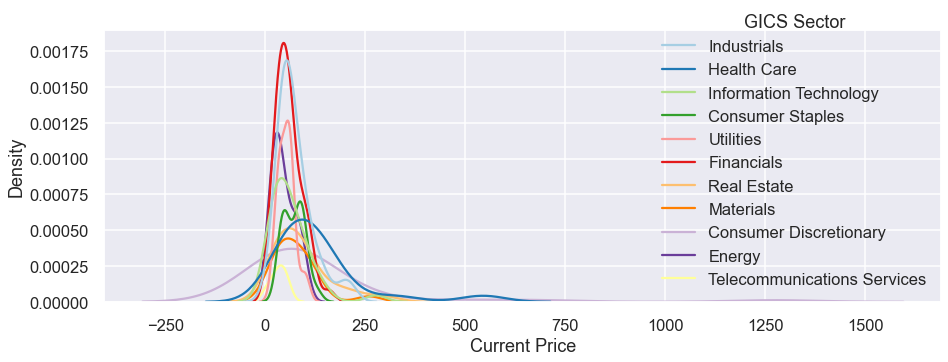

In [24]:
# What does a kdeplot of each sector's Current Price look like?

plt.figure(figsize=(15,5))
sns.kdeplot(data=df, x='Current Price', hue='GICS Sector', palette='Paired')

### Observations

- We see again that Consumer Staples has 2 peaks
- And as we've been seeing, some of the sectors' attributes overlap, and sometimes different sectors appear to be seperat clusters.
- It's time to scale the data and prepare for modeling to see how the data behaves when the numerical attributes are clustered.

# Data Preprocessing

- Duplicate value check - We already determined no rows are repeated in the Sanity Check ✔️
- Missing value treatment - There are no missing values to treat ✔️
- Outlier check - All the outliers detected are within reason and assumed to be accurate ✔️
- Feature engineering (if needed) - SCALING NEEDED because the numerical ranges vary widely (Next)
- Any other preprocessing steps (if needed) - Object columns need to be dropped (Next)

In [25]:
# Remove object columns: ticker, security, sector, and industry

# Apply StandardScaler to transform numerical variables to their z-score

obj_cols = ['Ticker Symbol','Security', 'GICS Sector', 'GICS Sub Industry']

df1 = df.drop(obj_cols, axis=1)

# Scaling the data set before clustering
scaler = StandardScaler()
subset = df1.copy()
subset_scaled = scaler.fit_transform(subset)

# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

# View top 5 rows of the new dataframe
subset_scaled_df.head()

Current Price  Price Change  Volatility    ROE  Cash Ratio  Net Cash Flow  \
0         -0.393         0.494       0.273  0.990      -0.211         -0.339   
1         -0.221         0.355       1.137  0.938       0.077         -0.002   
2         -0.367         0.602      -0.427 -0.193      -0.033          0.454   
3          0.134         0.826      -0.285 -0.317       1.218         -0.152   
4         -0.261        -0.493       0.296 -0.266       2.237          0.134   

   Net Income  Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  \
0       1.554               1.309                         0.108     -0.652   
1       0.928               0.057                         1.250     -0.312   
2       0.744               0.025                         1.098     -0.392   
3      -0.220              -0.231                        -0.092      0.947   
4      -0.203              -0.375                         1.978      3.293   

   P/B Ratio  
0     -0.507  
1     -0.504  
2      0.095  
3      0.424  
4      0.199

We now have a scaled dataset ready for clustering.


# Second EDA

- It is a good idea to explore the data once again after manipulating it.

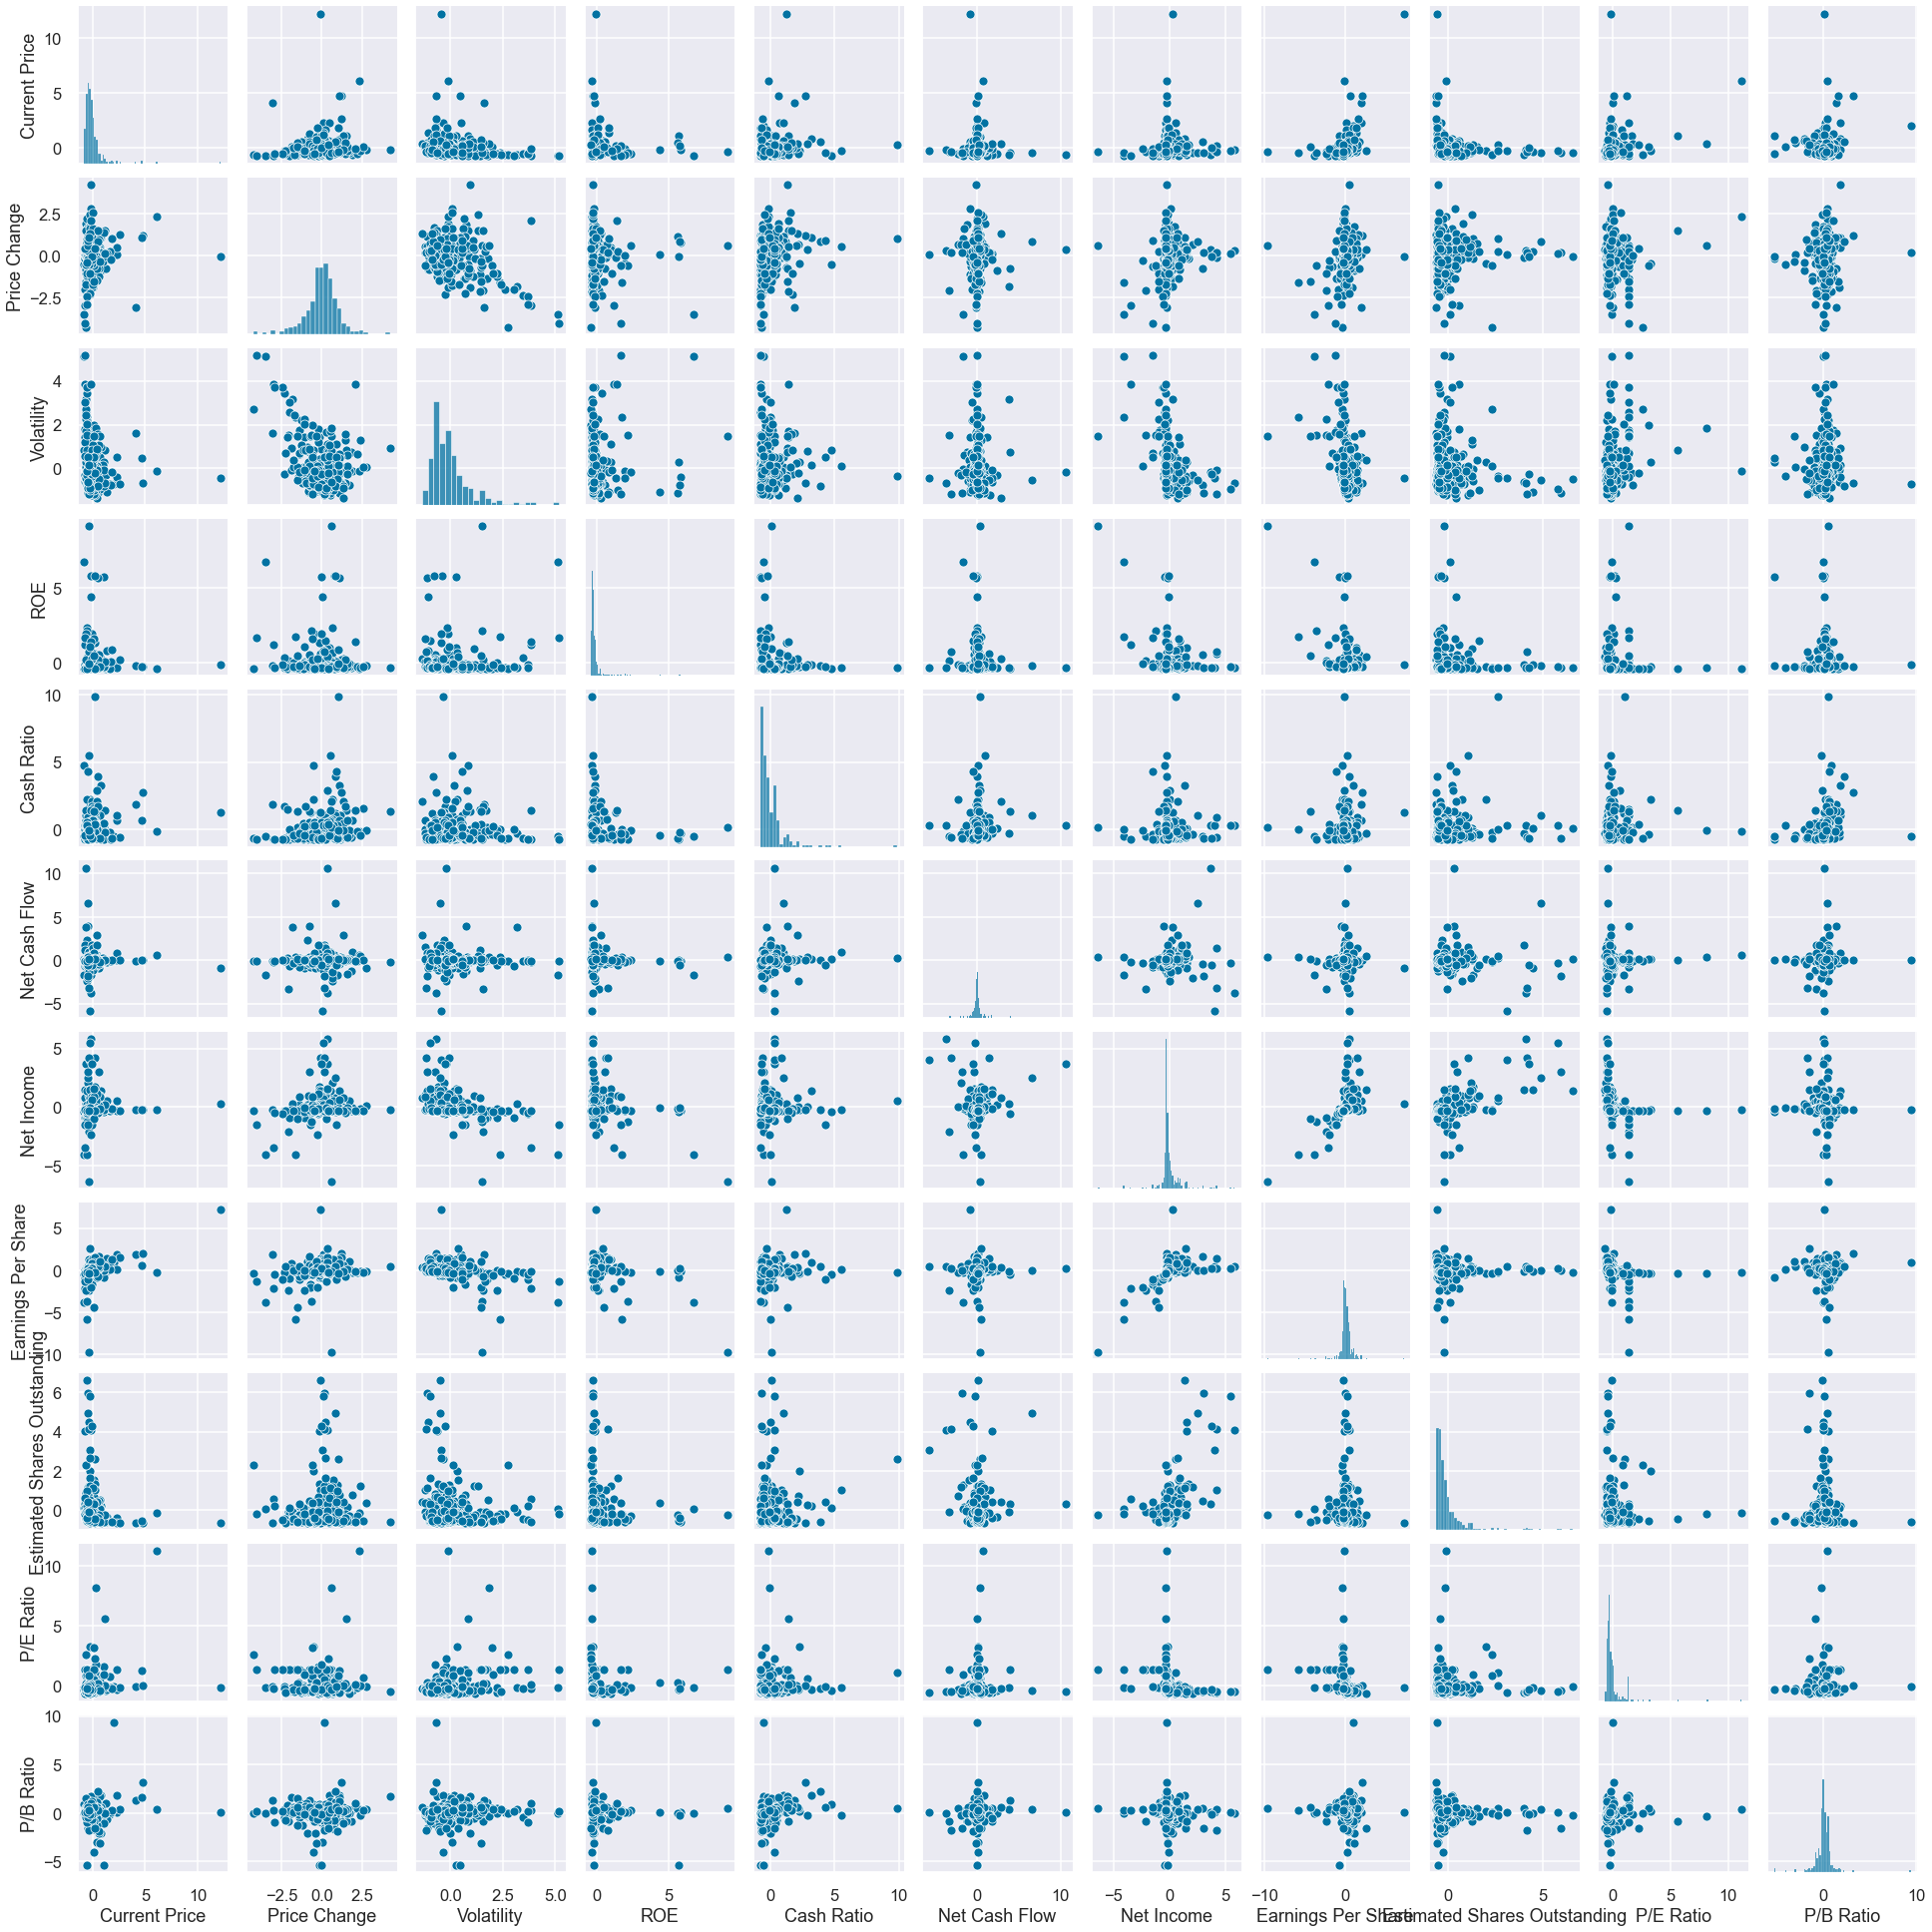

In [26]:
# Will the scatterplots look the same?

sns.pairplot(data=subset_scaled_df)

Text(0.5, 1.0, 'Correlation Coefficients of Scaled Numerical Variables')

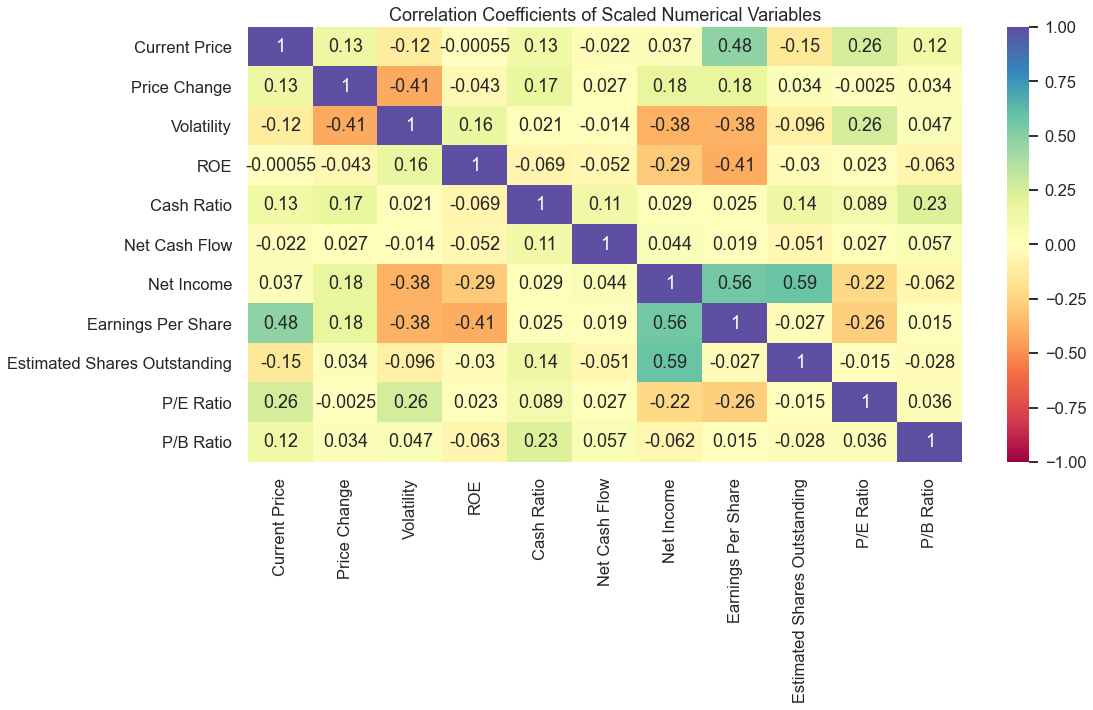

In [27]:
# What are the correlations of scaled variables?

plt.figure(figsize=(16,8))
sns.heatmap(subset_scaled_df.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.title("Correlation Coefficients of Scaled Numerical Variables")

The object columns were dropped, the remaining variables are scaled, the plots all look the same as expected, and the dataframe is ready for clustering.

## K-means Clustering

First we will use the Elbow Method to find the optimal number of clusters (k)

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.384499097487295
Number of Clusters: 3 	Average Distortion: 2.2659355306126447
Number of Clusters: 4 	Average Distortion: 2.1744689145709475
Number of Clusters: 5 	Average Distortion: 2.1087609945394776
Number of Clusters: 6 	Average Distortion: 2.068817263667957
Number of Clusters: 7 	Average Distortion: 2.0049396373681247
Number of Clusters: 8 	Average Distortion: 1.9949393941381546
Number of Clusters: 9 	Average Distortion: 1.954240398666947
Number of Clusters: 10 	Average Distortion: 1.8536473897121095
Wall time: 1.77 s


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

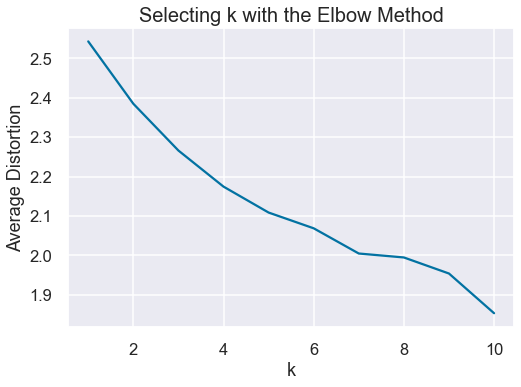

In [28]:
%%time

# Check for the average distortion for each value of k up to 10

clusters = range(1, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

### Observation

The sharp elbows appear to be at k=4 and k=8

### Let's look at another Elbow Graph

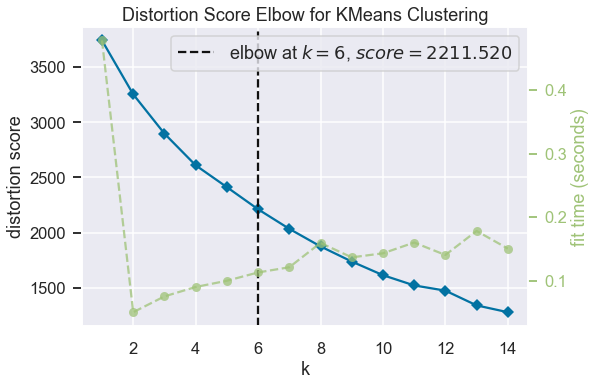

Wall time: 3.98 s


<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
%%time

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(subset_scaled_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Observation

This graph says the optimal number of clusters is 6. 

### Check the Silhouette Scores

For n_clusters = 2, silhouette score is 0.4484662124740991
For n_clusters = 3, silhouette score is 0.45494915445064904
For n_clusters = 4, silhouette score is 0.45434371948348606
For n_clusters = 5, silhouette score is 0.4120608730521192
For n_clusters = 6, silhouette score is 0.4626259961369853
For n_clusters = 7, silhouette score is 0.3912095009439477
For n_clusters = 8, silhouette score is 0.40193838741769927
For n_clusters = 9, silhouette score is 0.43469939265862173
For n_clusters = 10, silhouette score is 0.11694775028176425
For n_clusters = 11, silhouette score is 0.20000934514930355
For n_clusters = 12, silhouette score is 0.13154159320949113
Wall time: 1.54 s


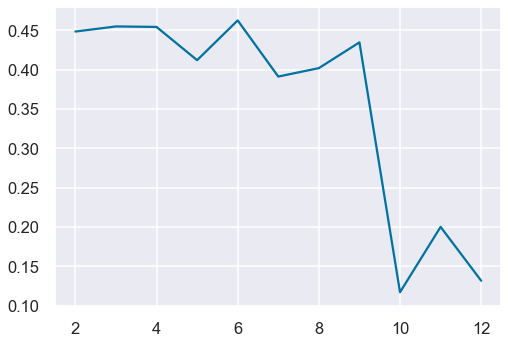

In [30]:
%%time

sil_score = []
cluster_list = list(range(2, 13))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

The silhouette score for 4 is higher than 6 or 8. Let's try 4, 6, and 8 for k.

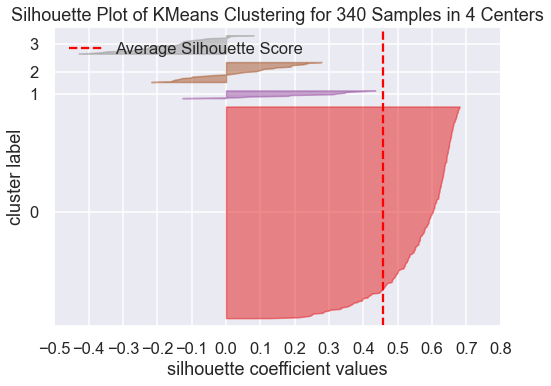

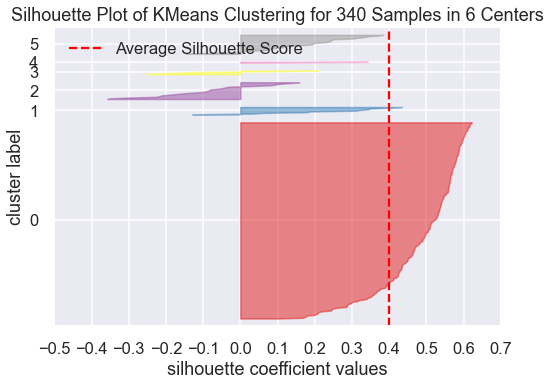

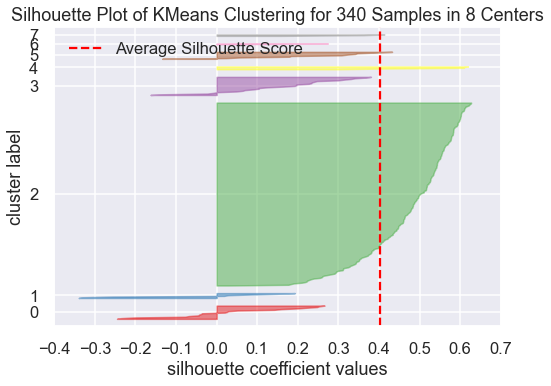

Wall time: 2.39 s


In [31]:
%%time

# finding optimal no. of clusters with silhouette coefficients

k=[4,6,8]
for i in k:
    visualizer = SilhouetteVisualizer(KMeans(i, random_state=1))
    visualizer.fit(subset_scaled_df)
    visualizer.show()

# Observation
### We will go with k = 4 because it had the strongest elbow, the highest silhouette score, 4 is a nice small number which makes labeling the categories easier, and because the distribution of stocks is more evenly spread out in 4 clusters.

## K-Means Cluster Profile

In [32]:
# Fit the KMeans model to the scaled data
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_
subset_scaled_copy = subset_scaled_df.copy()
subset_scaled_copy['K_means_segments'] = kmeans.labels_

cluster_profile = df.groupby("K_means_segments").mean()

cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Security"].count().values
)

# Display the means of each column and highlight the maxinum value
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [33]:
# Highlight the minimum values

cluster_profile.style.highlight_min(color="yellow", axis=0)

In [34]:
## Print the companies in each cluster

for cluster in df["K_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cluster))
    print(df[df["K_means_segments"] == cluster]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

# K-Means k = 4 Observation

Cluster 3:
   - Largest cluster with 277 stocks
   - Lowest average Estimated Shares Outstanding
   - Steady, middle-of-the-road stocks that move together
    
Cluster 0:
   - Size: 25 stocks
   - Lowest average ROE
   - Highest average Net Cash Flow, Earnings Per Share, P/B Ratio, Cash Ratio, Current Price, and Price Change
    
Cluster 1:
   - Size: 27 stocks
   - Lowest average Current Price, Price Change, Cash Ratio, Net Income, and Earnings Per Share
   - Highest average Volatility, ROE, and P/E Ratio
    
Cluster 2:
   - Smallest cluster with 11 stocks
   - Lowest average Volatility, Net Cash Flow, P/E Ratio, and P/B Ratio
   - Highest average Net Income and Estimated Shares Outstanding

Text(0.5, 1.0, 'Sector Distribution in K-Means Clustering where k=4')

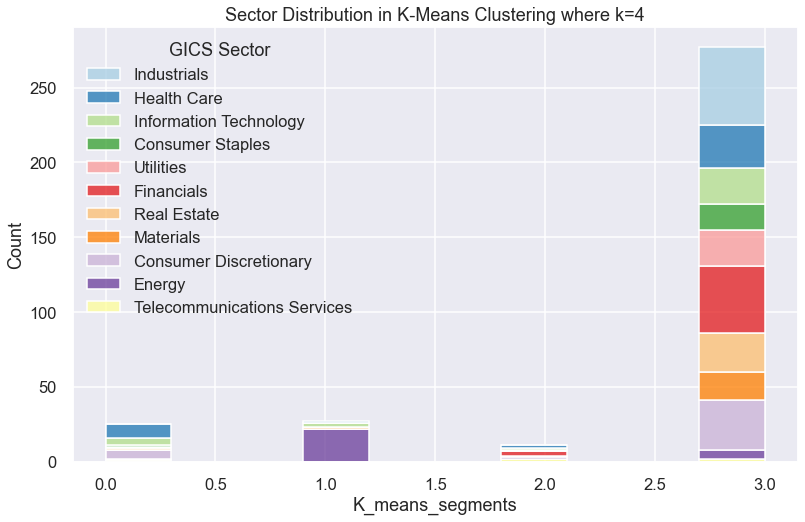

In [35]:
# What is the distribution of sectors in each cluster?

plt.figure(figsize=(13,8))
sns.histplot(data=df, x='K_means_segments', hue='GICS Sector', multiple='stack', palette='Paired')
plt.title("Sector Distribution in K-Means Clustering where k=4")

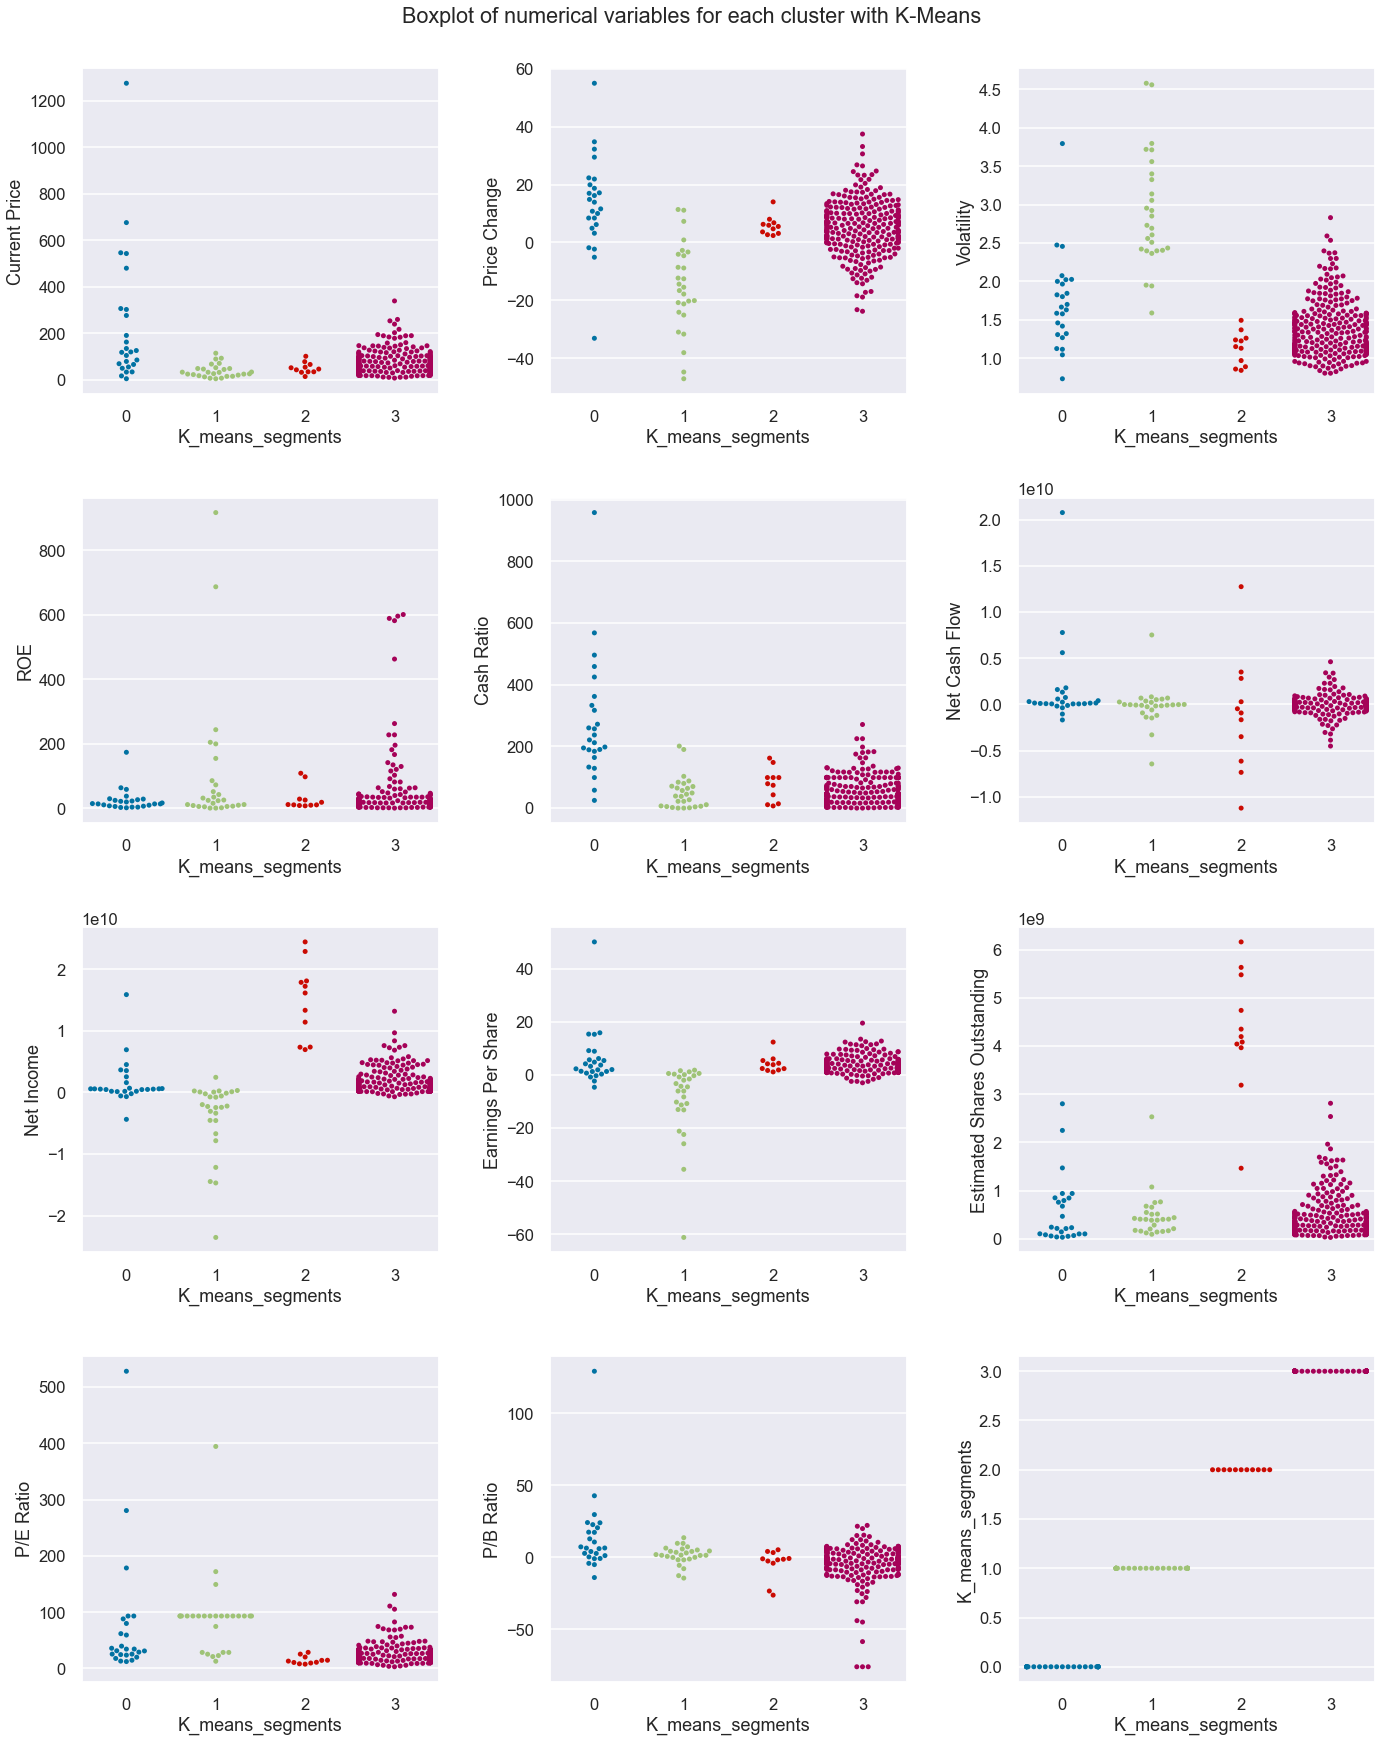

In [36]:
# Side by side Boxplot comparison of all 11 variables for each cluster

num_col = df.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(4, 3, figsize=(20, 25))
fig.suptitle("Boxplot of numerical variables for each cluster with K-Means")
counter = 0

for ii in range(4):
    sns.swarmplot(ax=axes[ii][0], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1
    sns.swarmplot(ax=axes[ii][1], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1
    sns.swarmplot(ax=axes[ii][2], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)


Text(0.5, 1.0, 'Contour Map showing K-Means Clusters')

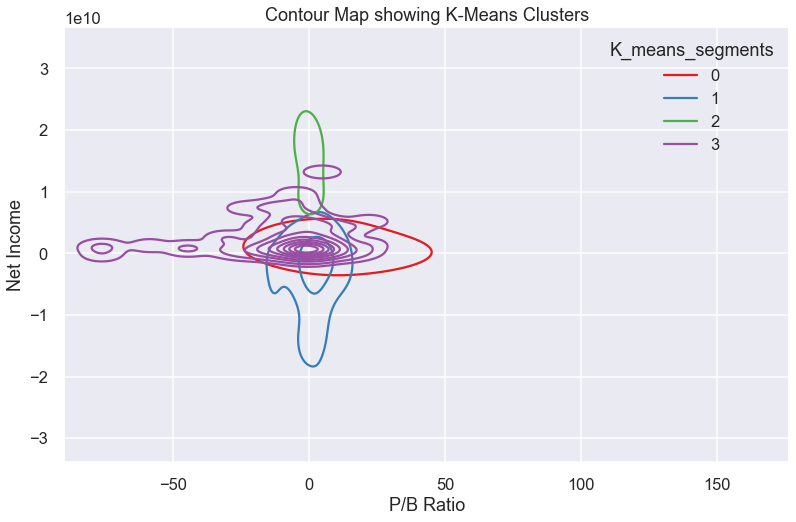

In [37]:
# Close-up of Multivariate Contour Map showing 4 seperate clusters

# P/B Ratio vs Net Income

plt.figure(figsize=(13,8))
sns.kdeplot(
    data=df,
    y="Net Income", x="P/B Ratio", hue='K_means_segments', palette='Set1')
plt.title("Contour Map showing K-Means Clusters")

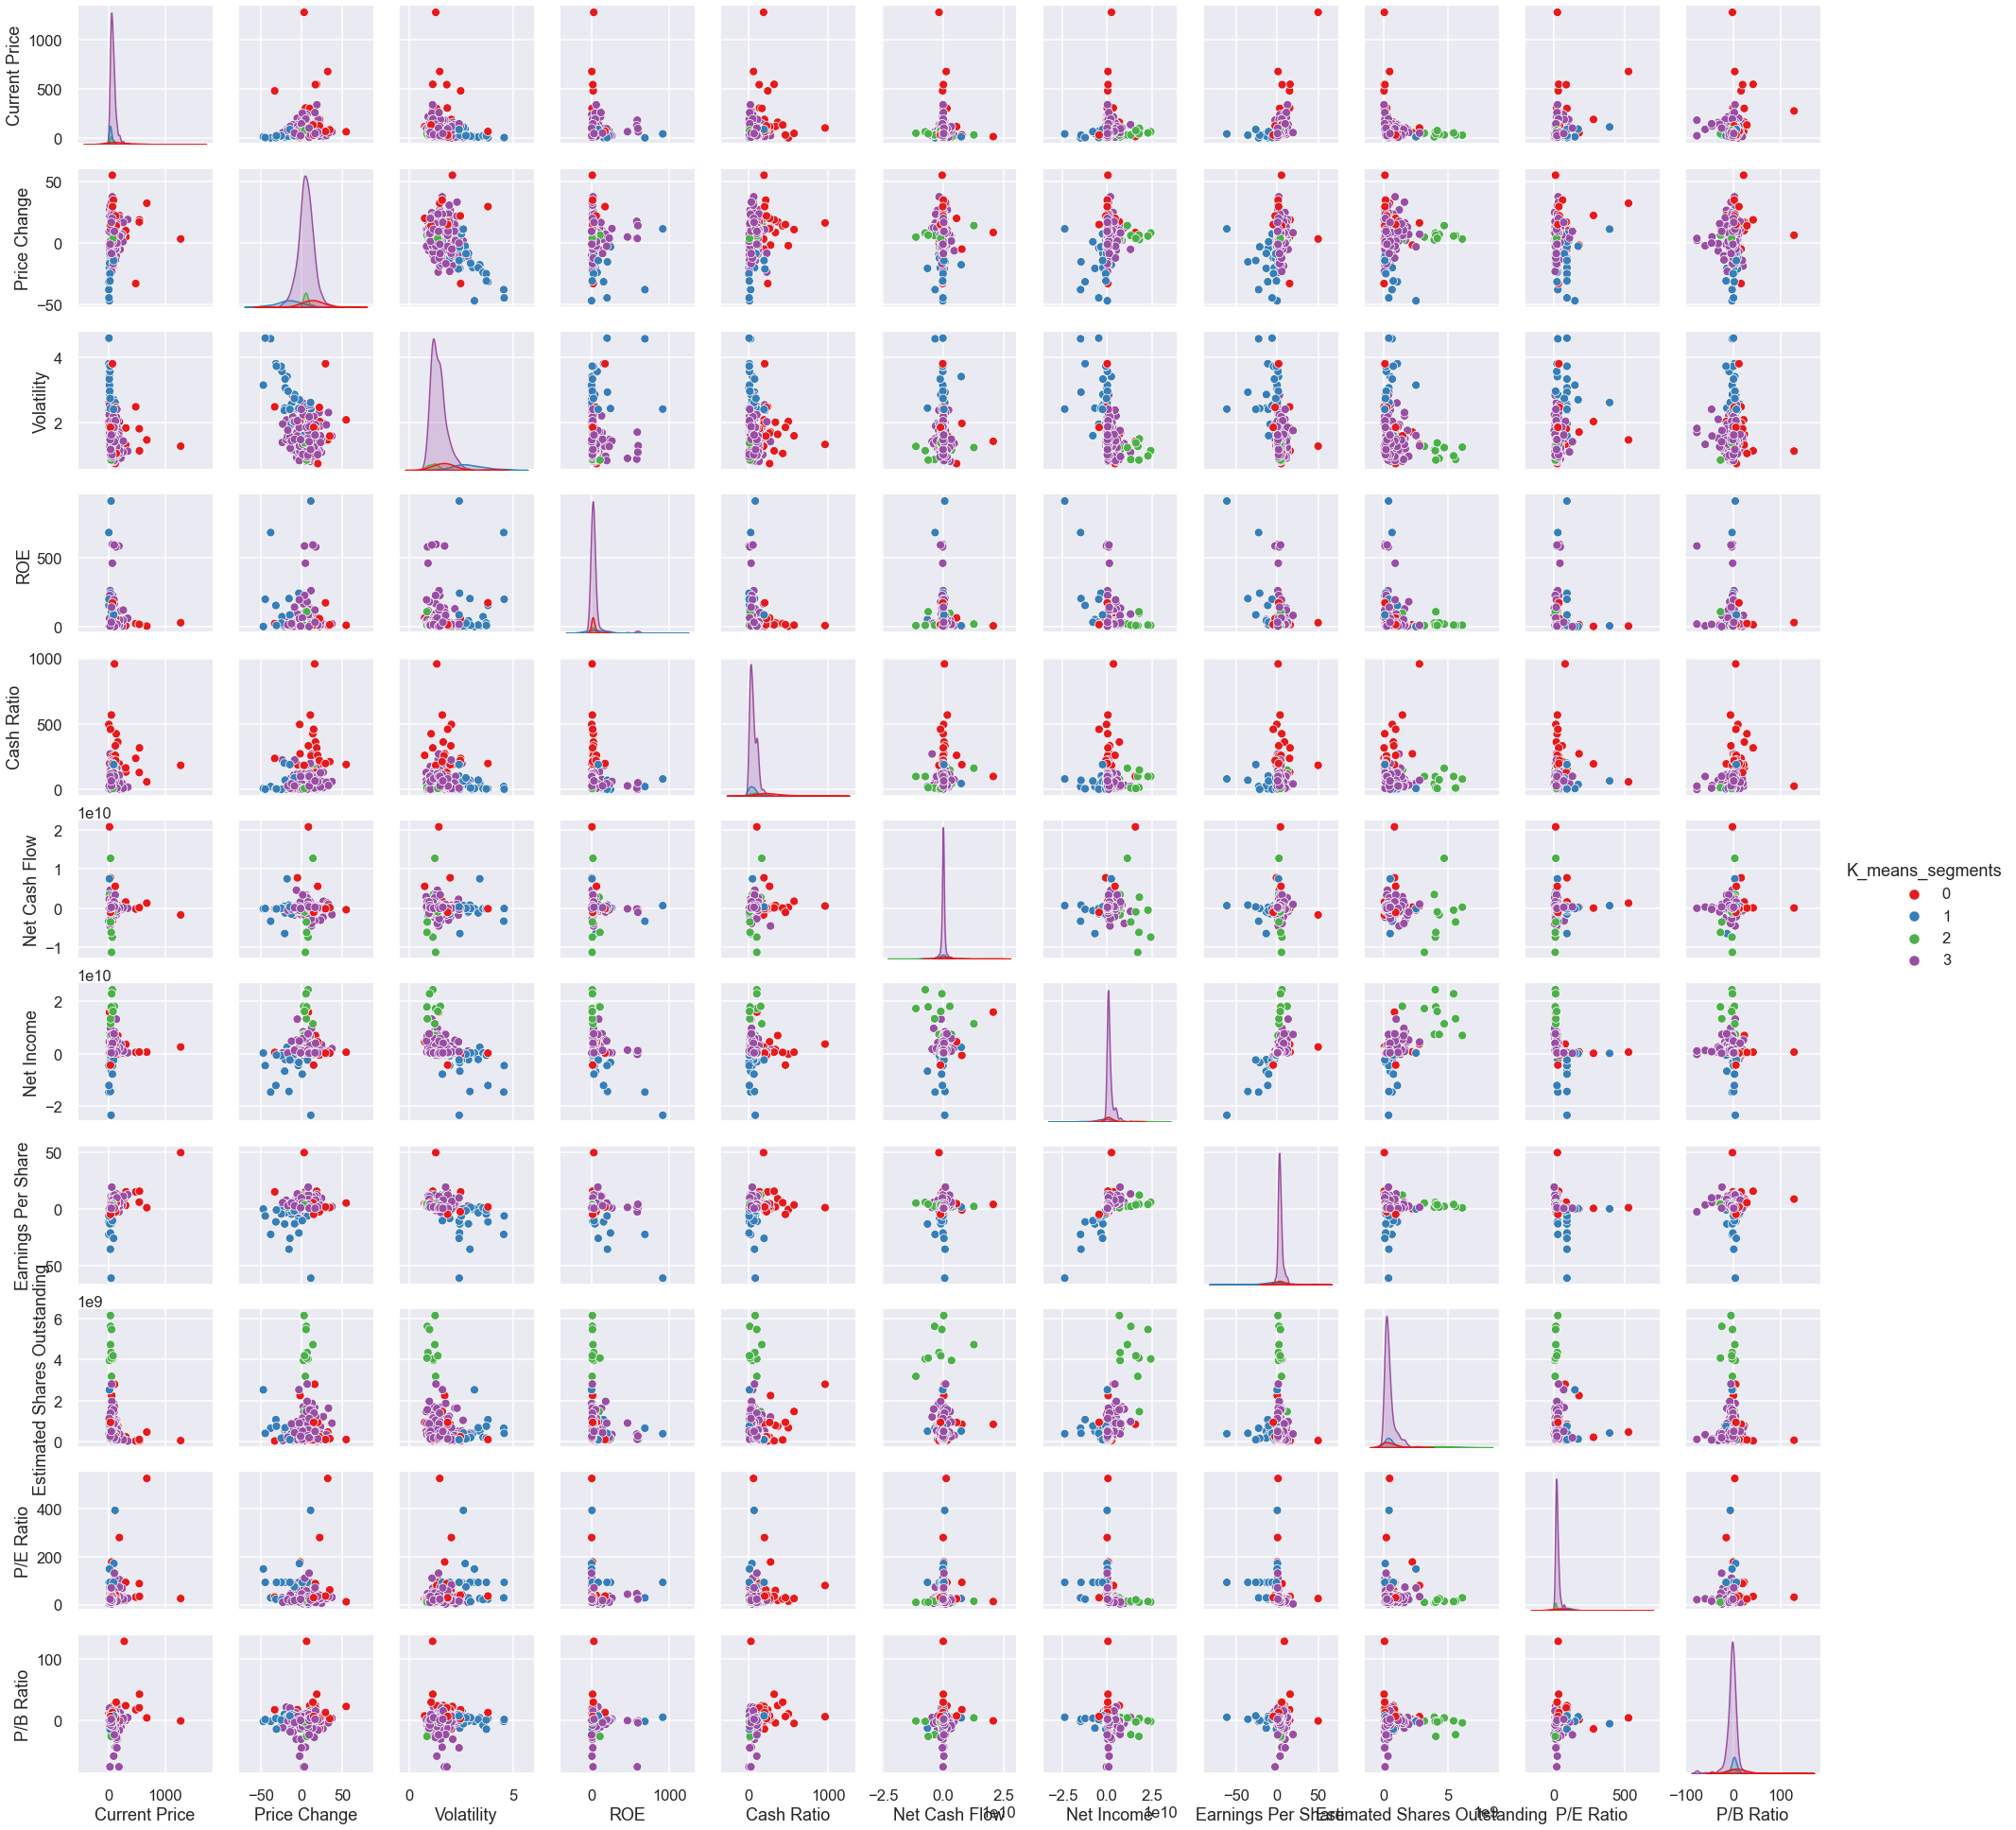

In [38]:
# How do the 4 clusters look in the rest of the variables?

sns.pairplot(data=df, hue='K_means_segments', palette='Set1')

### 👀 It's interesting to see the shape of the K-means clusters

Now it's time for hierarchical clustering.

# Hierarchical Clustering

In [39]:
%%time

# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850003.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correla

In [40]:
%%time
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.
Wall time: 0 ns


### Now we'll try all the linkage methods for Euclidean

In [41]:
%%time
# list of all linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
Wall time: 68.6 ms


In [42]:
%%time
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest Euclidean cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest Euclidean cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.
Wall time: 0 ns


# Observation

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

### Let's see the dendrograms for the different linkage methods in Euclidean distance.

Wall time: 6.93 s


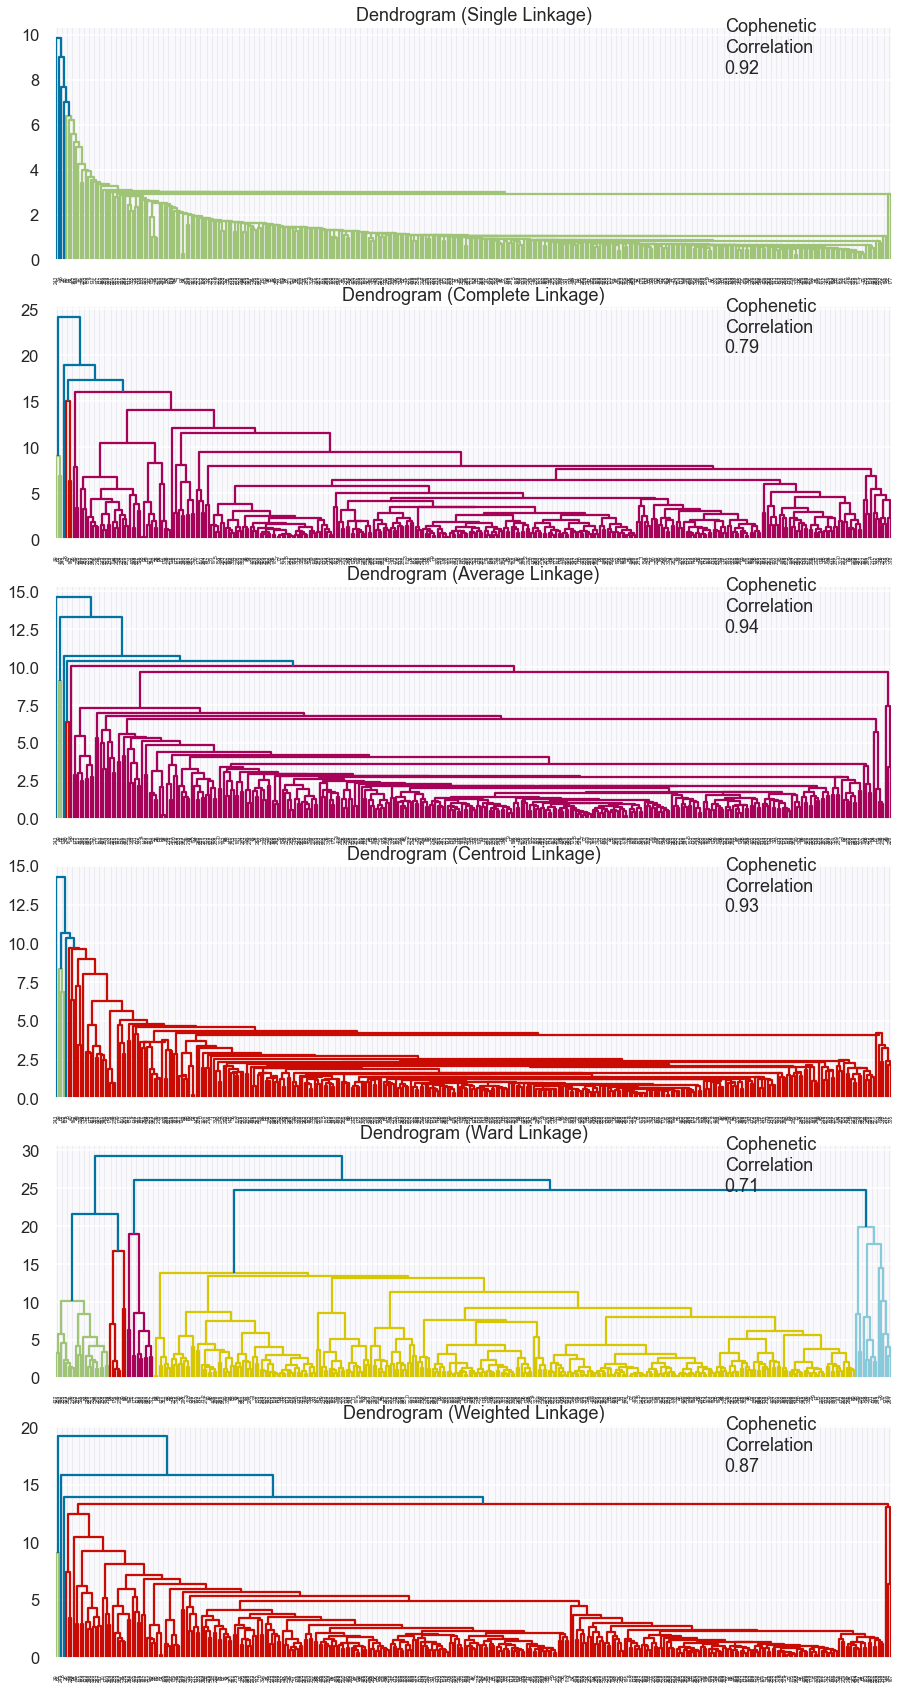

In [43]:
%%time

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
    compare.append([method, coph_corr])

In [44]:
%%time
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

Wall time: 3.57 ms


Linkage  Cophenetic Coefficient
4      ward                   0.710
1  complete                   0.787
5  weighted                   0.869
0    single                   0.923
3  centroid                   0.931
2   average                   0.942

## Observation

### Even though the model using average linkage and Euclidean had the highest cophenetic coefficient, the ward linkage and Euclidean distance dendogram shows the best distributions of clusters. We will go with with simpler model with 4 clusters and compare.

In [45]:
%%time
# Fit the model with chosen number of clusters
HCmodel = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward') 
HCmodel.fit(subset_scaled_df)

Wall time: 20.7 ms


AgglomerativeClustering(n_clusters=4)

In [46]:
%%time
# creating a copy of the original data
df2 = stock_data.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
subset_scaled_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

# view first 5 rows
df2.head()

Wall time: 10.2 ms


Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines         42.350        10.000       1.687  135   
1        Pharmaceuticals         59.240         8.339       2.198  130   
2  Health Care Equipment         44.910        11.301       1.274   21   
3   Application Software         93.940        13.977       1.358    9   
4         Semiconductors         55.320        -1.828       1.701   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000              11.390   
1          77       51000000  5144000000               3.150   
2          67      938000000  4423000000               2.940   
3         180     -240840000   629551000               1.260   
4         272      315120000   696878000               0.310   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  HC_segments  
0                 668129938.500      3.718     -8.784            3  
1                1633015873.000     18.806     -8.750            3  
2                1504421769.000     15.276     -0.394            3  
3                 499643650.800     74.556      4.200            3  
4                2247993548.000    178.452      1.060            3

### Hierarchical Cluster Profiles

In [47]:
# Group the dataset by clusters and display the averages

hcluster_profile = df2.groupby("HC_segments").mean()

hcluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

# Highlight maximum value in each column
hcluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [48]:
# Highlight minimum value in each column

hcluster_profile.style.highlight_min(color="yellow", axis=0)

In [49]:
## Print the companies in each cluster

for cluster in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cluster))
    print(df2[df2["HC_segments"] == cluster]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

# Hierarchical n = 4 Observation

Cluster 3:
   - Largest cluster with 285 stocks
   - Steady, middle-of-the-road stocks that move together
    
Cluster 0:
   - Size: 29 stocks
   - Lowest average Price Change, Cash Ratio, Net Cash Flow, Net Income, and Earnings Per Share
   - Highest average Volatility and ROE
    
Cluster 2:
   - Size: 15 stocks
   - Lowest average Current Price, Volatility, P/E Ratio, and P/B Ratio
   - Highest average Net Cash Flow, Net Income, and Estimated Shares Outstanding
    
Cluster 1:
   - Smallest cluster with 11 stocks
   - Lowest average ROE and Estimated Shares Outstanding
   - Highest average Current Price, Price Change, Cash Ratio, Earnings Per Share, and P/E Ratio

Text(0.5, 1.0, 'Hierarchical Clusters distribution of sectors where n=4')

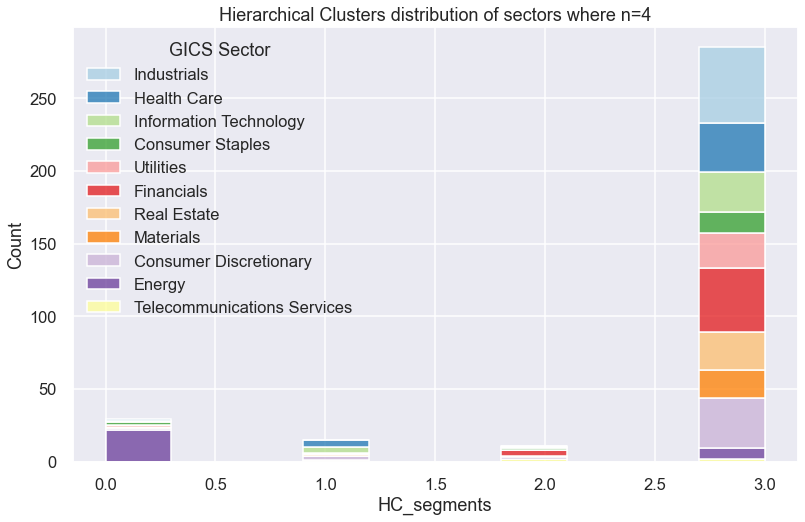

In [50]:
# What is the distribution of sectors in each cluster?

plt.figure(figsize=(13,8))
sns.histplot(data=df2, x='HC_segments', hue='GICS Sector', multiple='stack', palette='Paired')
plt.title("Hierarchical Clusters distribution of sectors where n=4")

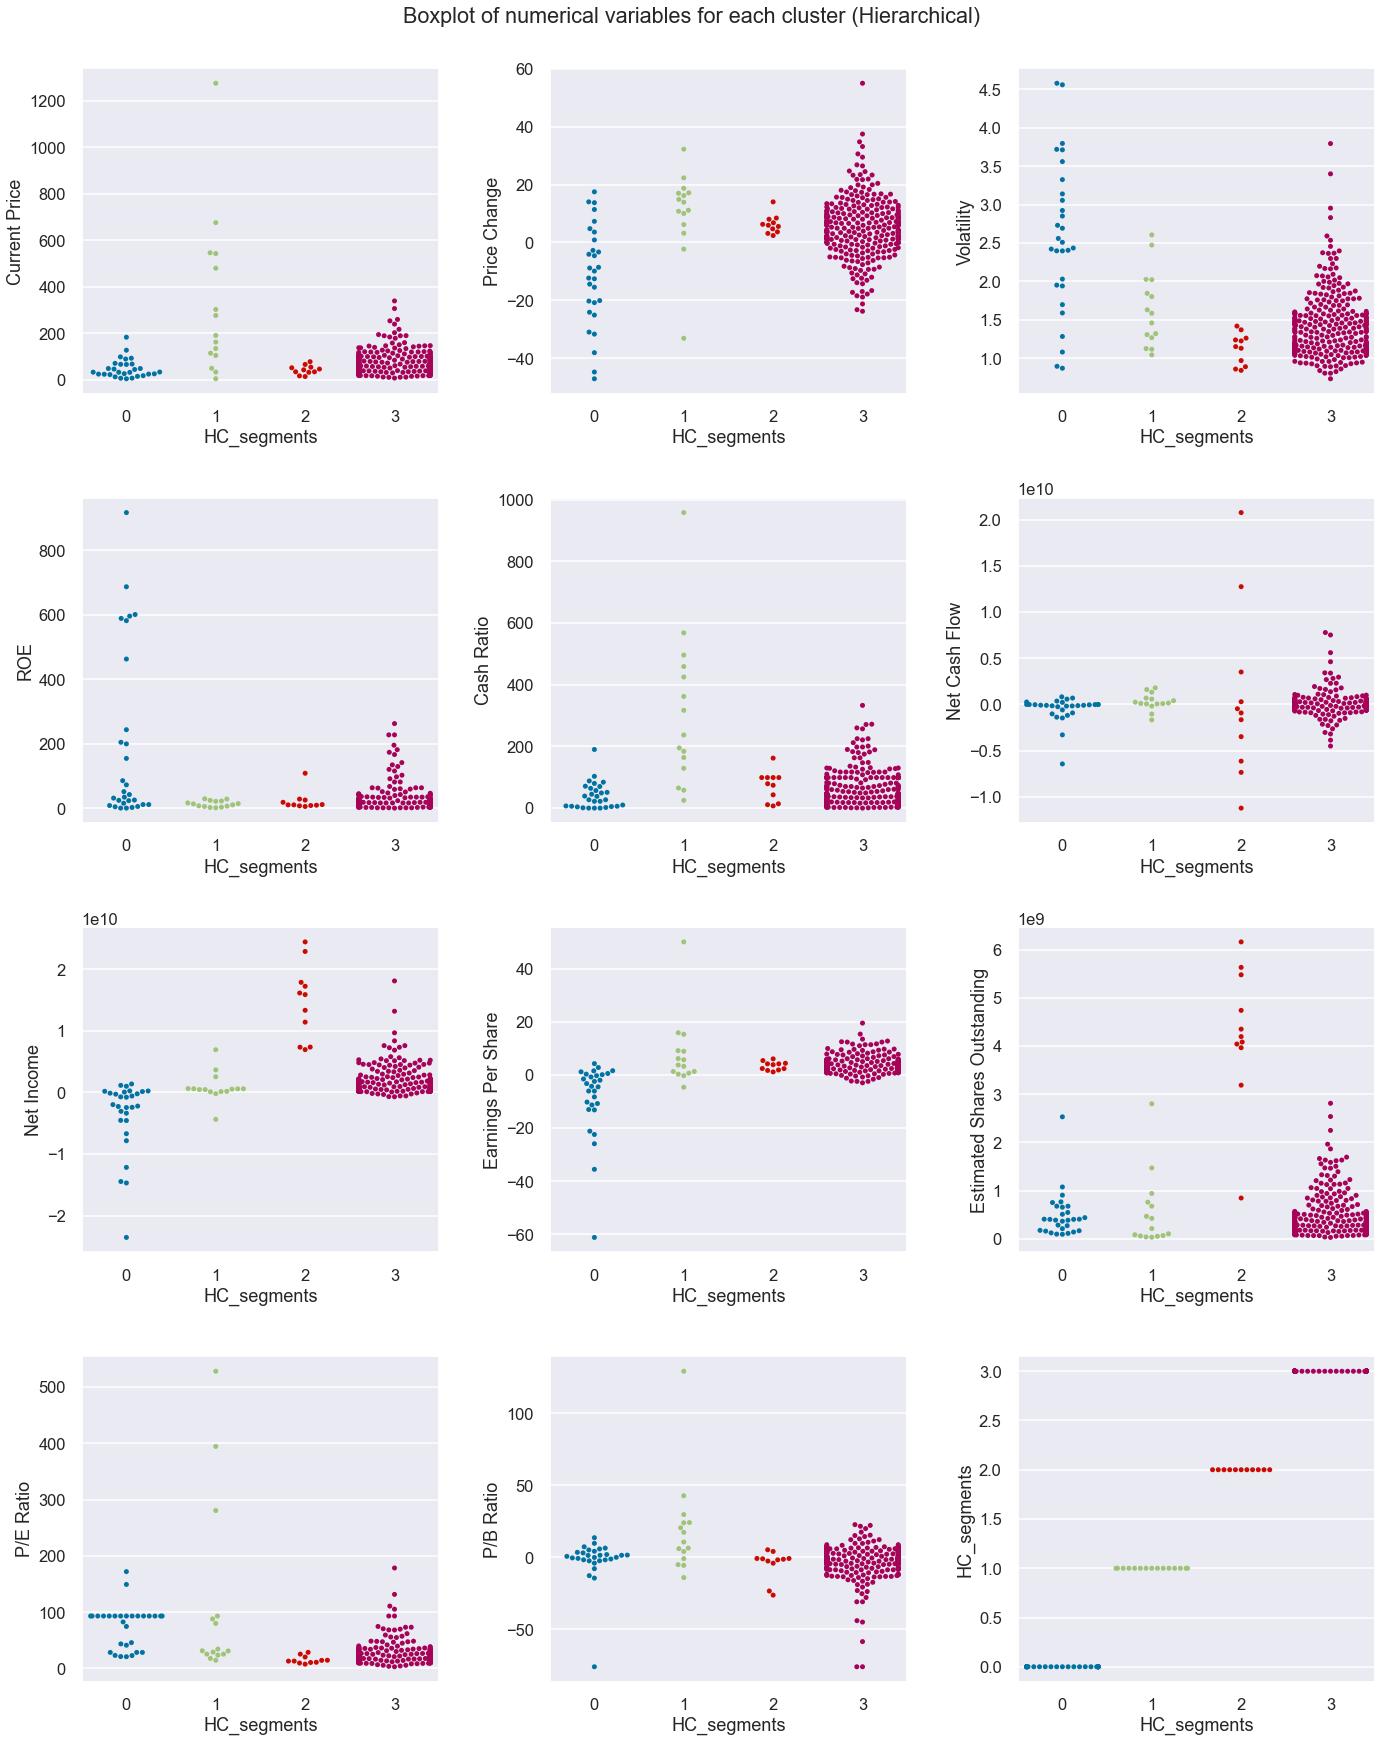

In [51]:
# Side by side Boxplot comparison of all 11 variables for each cluster

num_col = df2.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(4, 3, figsize=(20, 25))
fig.suptitle("Boxplot of numerical variables for each cluster (Hierarchical)")
counter = 0

for ii in range(4):
    sns.swarmplot(ax=axes[ii][0], y=df2[num_col[counter]], x=df2["HC_segments"])
    counter = counter + 1
    sns.swarmplot(ax=axes[ii][1], y=df2[num_col[counter]], x=df2["HC_segments"])
    counter = counter + 1
    sns.swarmplot(ax=axes[ii][2], y=df2[num_col[counter]], x=df2["HC_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

Text(0.5, 1.0, 'Contour Map showing Hierarchical Clusters')

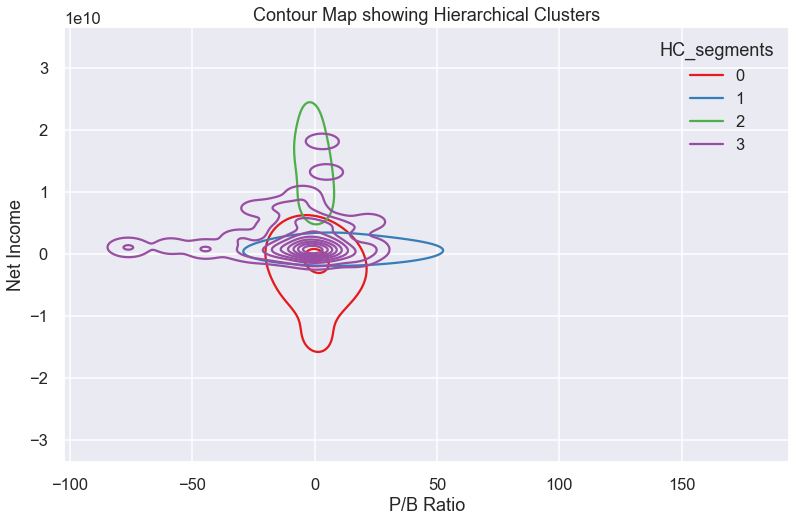

In [52]:
# Close-up of Multivariate Contour Map showing 4 seperate clusters

# P/B Ratio vs Net Income

plt.figure(figsize=(13,8))
sns.kdeplot(
    data=df2,
    y="Net Income", x="P/B Ratio", hue='HC_segments', palette='Set1')
plt.title("Contour Map showing Hierarchical Clusters")

In [53]:
# function to plot stacked bar chart and compare composition of sectors inside each cluster (Next Step)


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
#     print(tab1)
#     print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6), color=sns.color_palette("Paired")
)
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45)

    plt.show()

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How do the silhouette scores vary?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

## My Analysis

**Summary:** We started off with a tidy dataset of 340 stocks and their attributes. We removed the string columns and scaled all the numerical attributes down using the Z-score method. We explored visualizations of the dataset and noticed that many of the scatter-clouds and density graphs seemed to suggest that 4, 5, or 6 clusters might exist. We explored K-means clustering and hierarchical clustering and we decided to build both models based on 4 clusters. The resulting clusters from both techniques had quite a few similarities.

### K-Means Clustering Details

We obtained our K-means clustering results by performeing the elbow method several times and comparing the silhouette scores. We decided on 4 clusters because it had good scores, good distribution, and is simplistic for the sake of time. We noticed that as k got larger, several of the clusters had only 1 stock in them.


### Hierarchical Clustering Details

We obtained our hierarchical clustering results by using Euclidean distance and Ward linkage. This model did not have the highest cophenetic coefficient, but it was the only model that had a more even distribution of stocks. We decided on 4 stocks to keep things simple and comparable for this analysis.

### Comparison of Cluster Models

By setting the cluster number to 4 in both models, we can easily compare the similarities and see if the algorithms validate eacch other. Below is a comparison of the sector composition in each cluster. Notice how easy it is to match them even though they are not exactly alike.

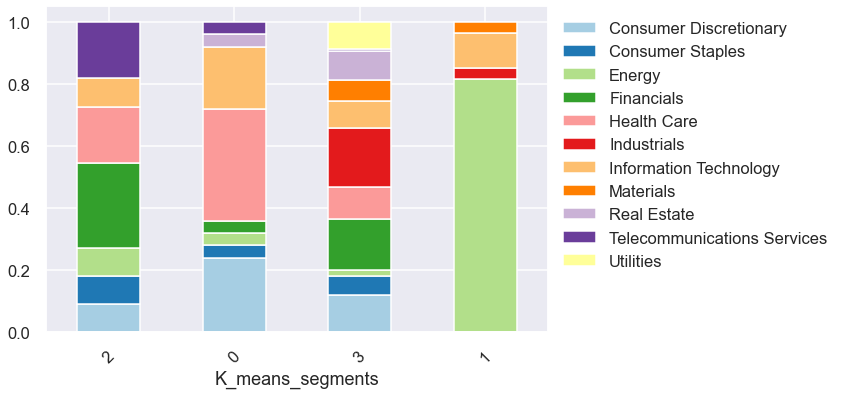

In [54]:
# K-Means Clustering by Sector

stacked_barplot(df, "K_means_segments", "GICS Sector")

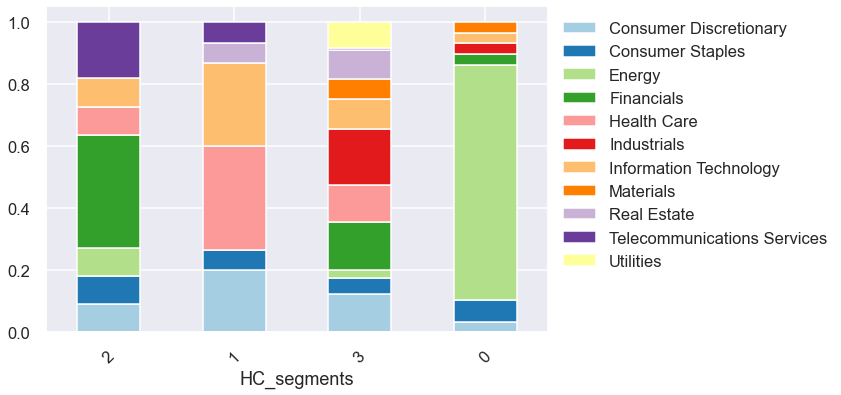

In [55]:
# Hierarchical Clustering by Sector 

stacked_barplot(df2, "HC_segments", "GICS Sector")

### Comparisons

Both models had 1 very large group that seemed to stay centered around the mean with a wide variety of sectors. We can think of this large cluster as "low risk" since it rarely deviates from the norm.

Both models also have a cluster mostly made up of the Energy sector and some Financial stocks, and both clusters have the highest average ROE and Volatility and the lowest Price Change, Cash Ratio, Net Income, and Earnings Per Share. These are "high risk" stocks that don't always perform well in the short term but perform really well over time.

####  "high risk" group in Hierarchical clustering:

['Allegion' 'Apache Corporation' 'Anadarko Petroleum Corp'
 'Baker Hughes Inc' 'Chesapeake Energy' 'Charter Communications'
 'Colgate-Palmolive' 'Cabot Oil & Gas' 'Concho Resources'
 'Devon Energy Corp.' 'EOG Resources' 'Freeport-McMoran Cp & Gld'
 'Hess Corporation' 'Kimberly-Clark' 'Kinder Morgan' 'Marathon Oil Corp.'
 'Murphy Oil' 'Noble Energy Inc' 'Newfield Exploration Co'
 'National Oilwell Varco Inc.' 'ONEOK' 'Occidental Petroleum'
 'Range Resources Corp.' 'Spectra Energy Corp.' 'S&P Global, Inc.'
 'Southwestern Energy' 'Teradata Corp.' 'Williams Cos.' 'Cimarex Energy']
 
#### "high risk" group in K-Means clustering:

['Apache Corporation' 'Anadarko Petroleum Corp' 'Baker Hughes Inc'
 'Chesapeake Energy' 'Cabot Oil & Gas' 'Concho Resources'
 'Devon Energy Corp.' 'EOG Resources' 'EQT Corporation'
 'Freeport-McMoran Cp & Gld' 'Hess Corporation'
 'Hewlett Packard Enterprise' 'Kinder Morgan' 'Marathon Oil Corp.'
 'Murphy Oil' 'Noble Energy Inc' 'Netflix Inc.' 'Newfield Exploration Co'
 'National Oilwell Varco Inc.' 'ONEOK' 'Occidental Petroleum'
 'Quanta Services Inc.' 'Range Resources Corp.' 'Southwestern Energy'
 'Teradata Corp.' 'Williams Cos.' 'Cimarex Energy']
 
#### Most of the stocks in these "high risk" groups are the same except for 10 of them.



The other two clusters are similar in size and structure, but the averages are not as similar.

Tuning and building the K-means model took 9.38 seconds whereas the Hierarchical model took about 12.5 seconds. Hierarchical clustering is expected to take longer, but since we are using a very small dataset, the times it took to build the models were about the same.

## Here is a final comparison of the cluster attributes in both models

Text(0.5, 1.0, 'Variation between attributes in K-Means Clustering')

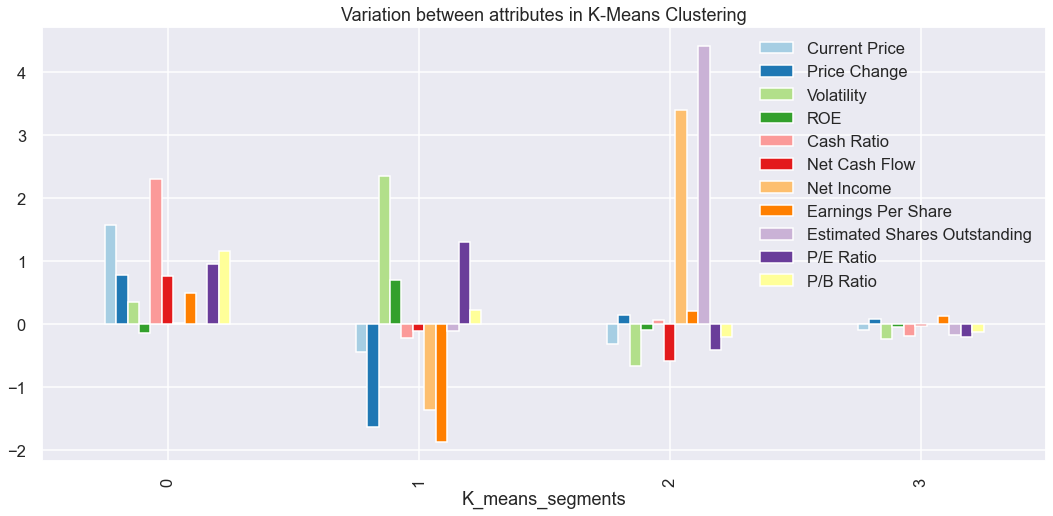

In [56]:
subset_scaled_copy.groupby("K_means_segments").mean().plot.bar(figsize=(18, 8), color=sns.color_palette("Paired"))
plt.title("Variation between attributes in K-Means Clustering")

Text(0.5, 1.0, 'Variation between attributes in Hierarchical Clustering')

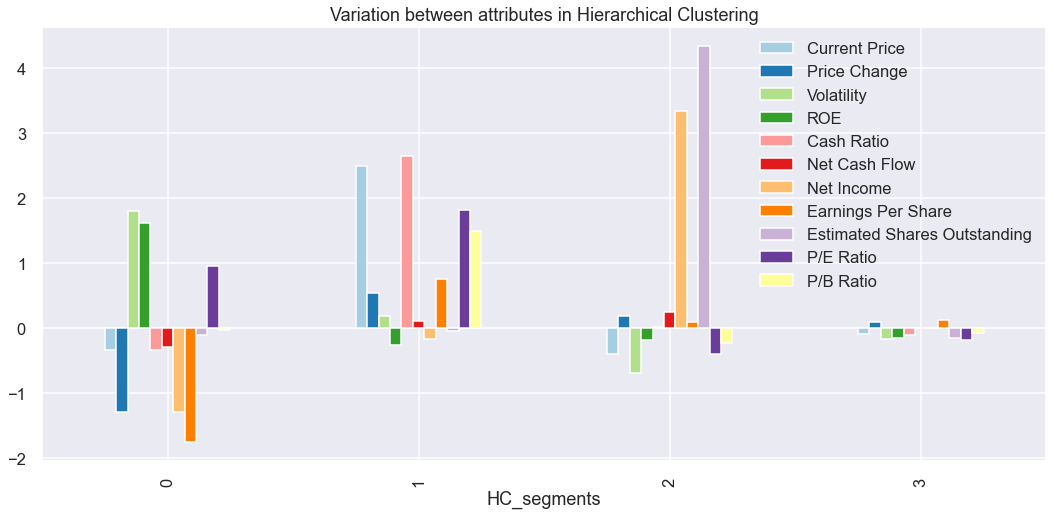

In [57]:
subset_scaled_df.groupby("HC_segments").mean().plot.bar(figsize=(18, 8), color=sns.color_palette("Paired"))
plt.title("Variation between attributes in Hierarchical Clustering")

- Cluster 3 in each model (the ones with the smallest bars) we will name **Middle of the Road**
- Cluster 2 in each model (the ones with lowest volatility and highest Net Income) we will call **Low Risk**
- The clusters with the highest average volatility and ROE we will call **High Risk High Reward**
- The clusters with the highest average current price and Cash Ratio we will call **Overvalued**


## Actionable Insights and Recommendations

- **Low Risk** - This cluster is excellent for anyone seeking to get started and guard their investments


- **Middle of the Road** - This cluster makes up the bulk of stocks in our datasets. All of the stocks in this cluster move together with the general trend. A good strategy is to diversify in this cluster. 


- **High Risk High Reward** - This cluster is for adventure-seekers who can handle the ups and downs of the market for a big payoff.


- **Overvalued** - This cluster is for the stocks that are overvalued and may fizzle out soon. Use caution in this cluster.
